<a href="https://colab.research.google.com/github/Jihyun13579/Store-Sales-Forecasting/blob/main/3_EDA_Type_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Ìå®ÌÇ§ÏßÄ Î°úÎî©**

In [ ]:
### Í∏∞Î≥∏
import numpy as np
import pandas as pd
import os
import gc
import warnings

### ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # ÎèôÏ†Å ÏãúÍ∞ÅÌôî

## ÏòµÏÖò ÏÑ§Ï†ï
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

### ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù Ìå®ÌÇ§ÏßÄ(ACF, PACF)
import statsmodels.api as sm

# **1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA ÌïôÌöå_OB/OB_project_vaca/train_preprocessed.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA ÌïôÌöå_OB/OB_project_vaca/test_preprocessed.csv')

In [ ]:
train.head()

id        date  store_nbr                      family  sales  onpromotion  \
0   0  2013-01-01          1                  AUTOMOTIVE   0.00         0.00   
1   1  2013-01-01         41                     SEAFOOD   0.00         0.00   
2   2  2013-01-01         41  SCHOOL AND OFFICE SUPPLIES   0.00         0.00   
3   3  2013-01-01         41                     PRODUCE   0.00         0.00   
4   4  2013-01-01         41              PREPARED FOODS   0.00         0.00   

      city      state type  cluster  dcoilwtico  transactions   holiday  
0    Quito  Pichincha    D       13       93.14          0.00  National  
1  Machala     El Oro    D        4       93.14          0.00  National  
2  Machala     El Oro    D        4       93.14          0.00  National  
3  Machala     El Oro    D        4       93.14          0.00  National  
4  Machala     El Oro    D        4       93.14          0.00  National

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   float64
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  holiday       object 
dtypes: float64(4), int64(3), object(6)
memory usage: 268.3+ MB


In [ ]:
test.head()

id        date  store_nbr      family  onpromotion   city      state  \
0  3000888  2017-08-16          1  AUTOMOTIVE            0  Quito  Pichincha   
1  3000889  2017-08-16          1   BABY CARE            0  Quito  Pichincha   
2  3000890  2017-08-16          1      BEAUTY            2  Quito  Pichincha   
3  3000891  2017-08-16          1   BEVERAGES           20  Quito  Pichincha   
4  3000892  2017-08-16          1       BOOKS            0  Quito  Pichincha   

  type  cluster  dcoilwtico  holiday  
0    D       13       46.80  Weekday  
1    D       13       46.80  Weekday  
2    D       13       46.80  Weekday  
3    D       13       46.80  Weekday  
4    D       13       46.80  Weekday

In [ ]:
# dateÎ•º datetime ÌòïÏúºÎ°ú Î≥ÄÍ≤Ω

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2705087 entries, 0 to 2705086
Data columns (total 13 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   float64       
 6   city          object        
 7   state         object        
 8   type          object        
 9   cluster       int64         
 10  dcoilwtico    float64       
 11  transactions  float64       
 12  holiday       object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 268.3+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
 5   city         28512 non-null  object        
 6   state        28512 non-null  object        
 7   type         28512 non-null  object        
 8   cluster      28512 non-null  int64         
 9   dcoilwtico   28512 non-null  float64       
 10  holiday      28512 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 2.4+ MB


- Ï†úÎåÄÎ°ú Î≥ÄÍ≤ΩÎêòÏóàÎã§.

## **üìå Data Description**
| Index | Column        | Description                     |
|-------|---------------|---------------------------------|
| 1     | id            | Í∞Å Îç∞Ïù¥ÌÑ∞Î•º Íµ¨Î∂ÑÌïòÍ∏∞ ÏúÑÌïú ÏãùÎ≥ÑÏûê|
| 2     | date          |ÌåêÎß§ÏùºÏûê                         |
| 3     | store_nbr     |Îß§Ïû• Í≥†Ïú† ÏãùÎ≥ÑÎ≤àÌò∏               |
| 4     | family        |ÌåêÎß§ÎêòÎäî Ï†úÌíàÍµ∞ Ïú†Ìòï             |
| 5     | sales         |Îß§Ï∂úÏï°, **target Î≥ÄÏàò**        |
| 6     | onpromotion   |ÌîÑÎ°úÎ™®ÏÖò ÎåÄÏÉÅ Ï†úÌíà Ïàò            |
| 7     | city          |ÎèÑÏãú                             |
| 8     | state         |Ï£º                               |
| 9     | type          |Îß§Ïû• Ïú†Ìòï                        |
| 10    | cluster       |Ïú†ÏÇ¨Ìïú Îß§Ïû•Îì§Ïùò Íµ∞Ïßë             |
| 11    | dcoilwtico    |Ïú†Í∞Ä(Í∏∞Î¶ÑÍ∞í)                     |
| 12    | transactions  |Í±∞ÎûòÎüâ                           |
| 13    | holiday       |Í≥µÌú¥Ïùº Ï¢ÖÎ•ò                      |



# **2. ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù**
- target Î≥ÄÏàòÏóê ÎåÄÌïú ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏùÑ ÏßÑÌñâÌï¥ Î≥¥Ïûê.

In [ ]:
### ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑù ÏãúÏóêÎäî ÏùºÎ≥Ñ ÌèâÍ∑†Í∞íÏùÑ ÌôúÏö©Ìï† ÏòàÏ†ï

# salesÍ∞Ä ÏóÜÎäî(0Ïù∏) Îç∞Ïù¥ÌÑ∞Îäî Ï†úÏô∏
train2 = train[train['sales'] != 0]

# ÏùºÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
daily_average = train2.groupby(['date'])['sales'].mean()

## **2-1. ÏãúÎèÑÌëú**

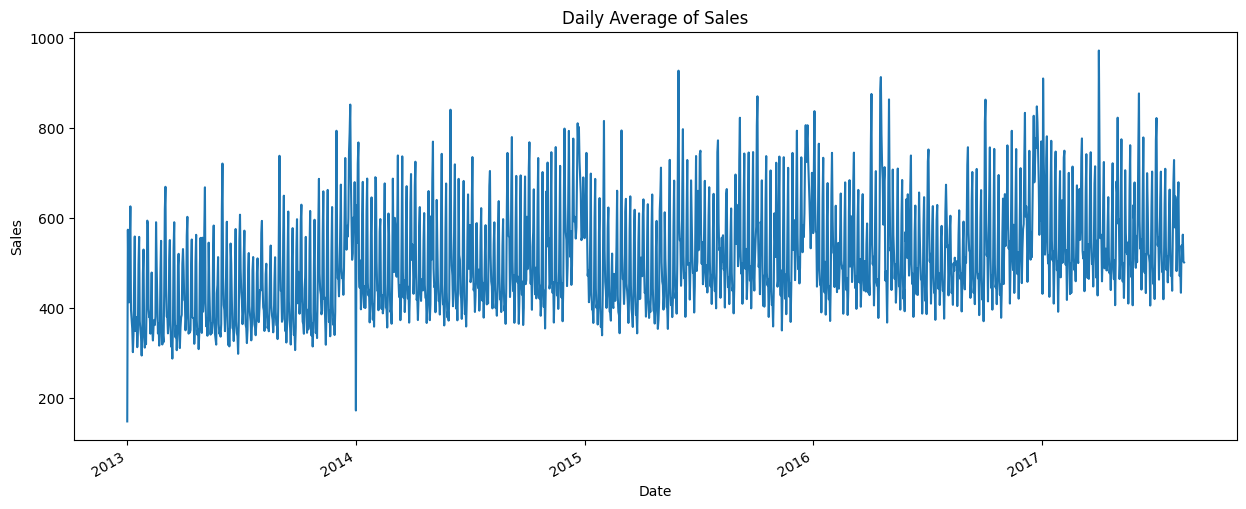

In [ ]:
daily_average.plot(figsize = (15, 6))
plt.title('Daily Average of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

- Ï§ëÍ∞ÑÏ§ëÍ∞Ñ Ìú¥ÏóÖÏúºÎ°ú Ïù∏Ìïú Î∂àÍ∑úÏπôÏÑ±ÏùÑ Î≥¥ÏûÑ
- ÌäπÌûà 2013, 2014ÎÖÑ Ï¥àÏóê Í∏âÍ≤©Ìïú Îß§Ï∂ú Ï†ÄÌïòÎ•º Î≥¥Ïù¥Îäî Íµ¨Í∞ÑÎì§Ïù¥ Ï°¥Ïû¨

## **2-2. ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥(time series decomposition)**

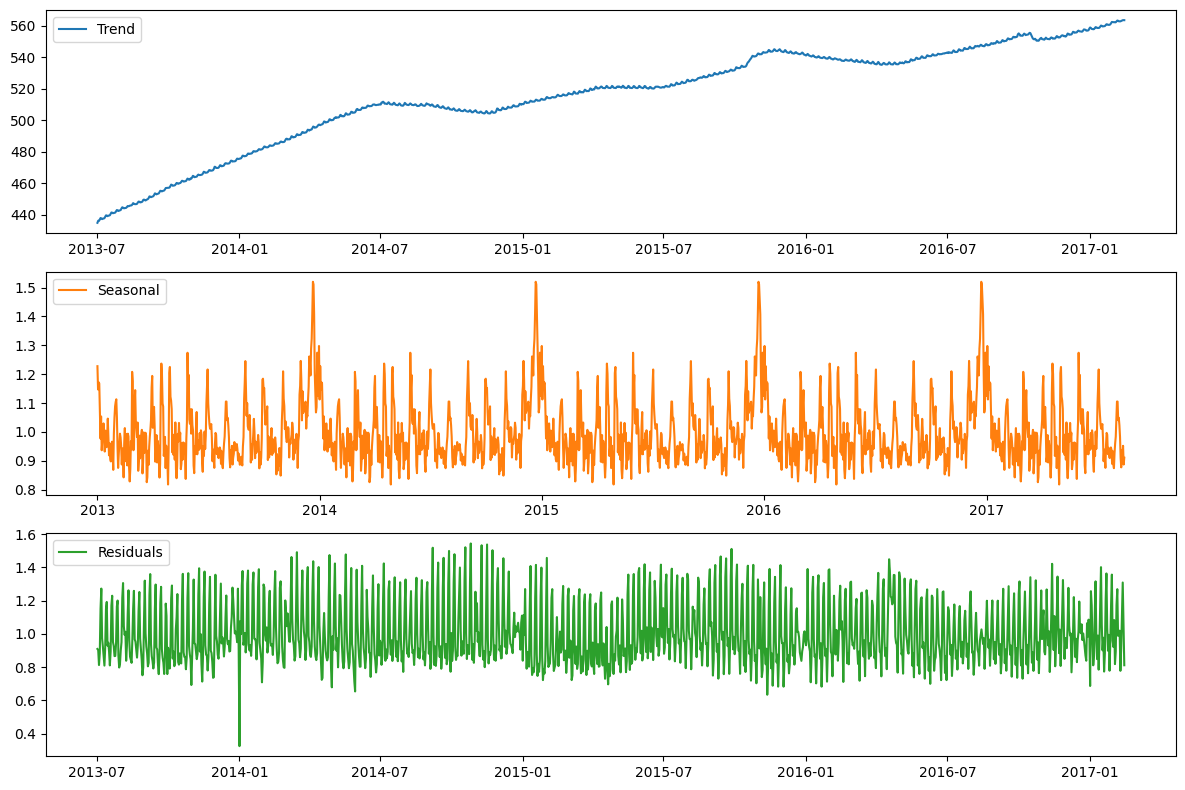

In [ ]:
## ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï¥(Ïó∞ Îã®ÏúÑÎ°ú Î∂ÑÌï¥)
result = sm.tsa.seasonal_decompose(daily_average, model='multiplicative', period=365)

# ÏÉâÏÉÅ ÏÑ§Ï†ï
colors = plt.cm.tab10.colors

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))

# Ï∂îÏÑ∏(Trend)
plt.subplot(3, 1, 1)
plt.plot(result.trend, label='Trend', color=colors[0])
plt.legend(loc='upper left')

# Í≥ÑÏ†àÏÑ±(Seasonality)
plt.subplot(3, 1, 2)
plt.plot(result.seasonal, label='Seasonal', color=colors[1])
plt.legend(loc='upper left')

# ÏûîÏ∞®(Residuals) Î∂ÑÏÑù
plt.subplot(3, 1, 3)
plt.plot(result.resid, label='Residuals', color=colors[2])
plt.legend(loc='upper left')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()

# ÏãúÍ∞ÅÌôî ÌëúÏãú
plt.show()

- Ï∂îÏÑ∏(Trend)
  - Ïö∞ÏÉÅÌñ• Ï∂îÏÑ∏Î•º Î≥¥Ïù∏Îã§.
  > Ìñ•ÌõÑÏóêÎèÑ Îß§Ï∂úÏï°Ïù¥ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥ÎùºÍ≥† ÏòàÏ∏°Ìï† Ïàò ÏûàÎã§.

- Í≥ÑÏ†àÏÑ±(Seasonality)
  - Ï£ºÎ°ú Ïó∞Îßê(11~12Ïõî)Ïóê Îß§Ï∂úÏù¥ Ï¶ùÍ∞ÄÌïòÍ≥† Ïù¥ÌõÑ Í∞êÏÜåÌïúÎã§.
  > Í≥ÑÏ†àÏ†Å Ï£ºÍ∏∞ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïúÎã§.
  
- ÏûîÏ∞® Î∂ÑÏÑù
  - ÏûîÏ∞®Ïóê Ïñ¥Îñ†Ìïú Ìå®ÌÑ¥ÏùÑ Î≥¥Ïù¥Í≥† ÏûàÏßÄ ÏïäÎã§.


## **2-3. Ï†ïÏÉÅÏÑ±(Stationarity)**

### **1Ô∏è‚É£ ACF, PACF**

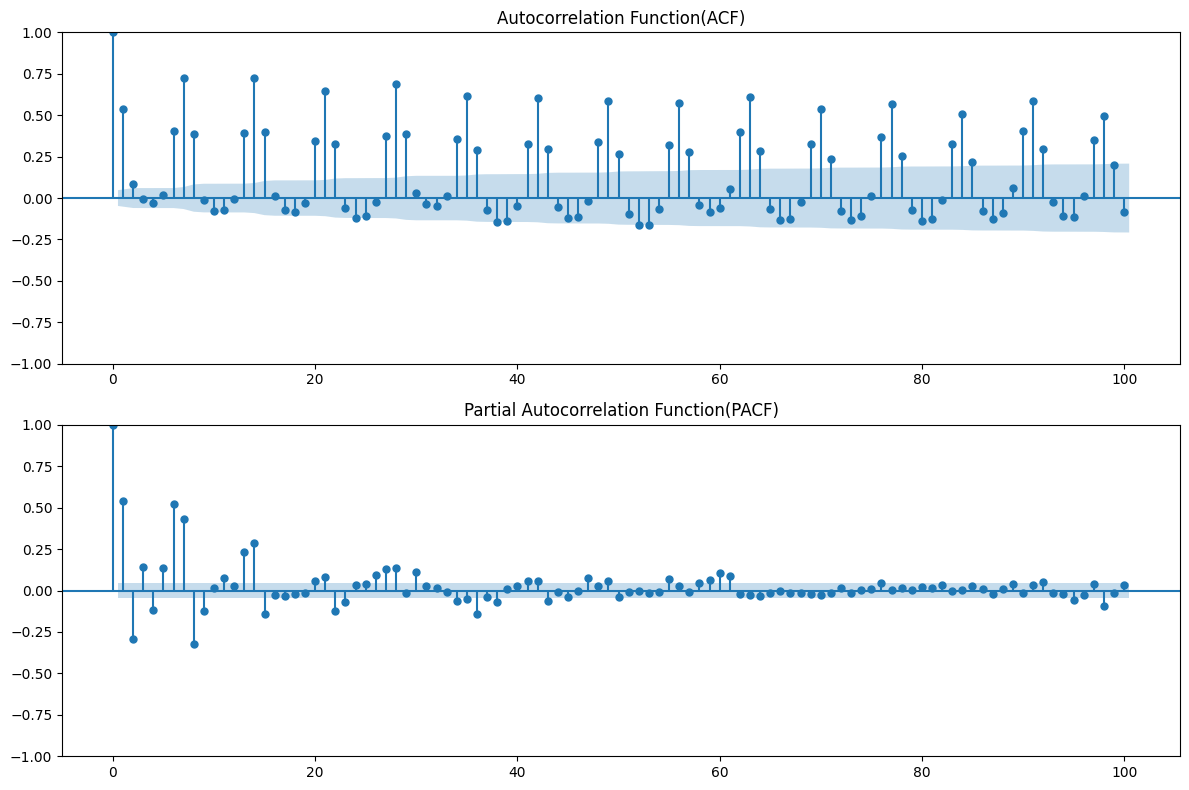

In [ ]:
# ACF Î∞è PACF Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# ACF ÏãúÍ∞ÅÌôî
sm.graphics.tsa.plot_acf(daily_average, lags=100, ax=axes[0])
axes[0].set_title('Autocorrelation Function(ACF)')

# PACF ÏãúÍ∞ÅÌôî
sm.graphics.tsa.plot_pacf(daily_average, lags=100, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function(PACF)')

# Î†àÏù¥ÏïÑÏõÉ Ï°∞Ï†ï
plt.tight_layout()

# ÏãúÍ∞ÅÌôî ÌëúÏãú
plt.show()

- ACF Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî Í≤∞Í≥º ÌäπÏ†ï Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌïúÎã§
  - Í≥°ÏÑ†Ïùò ÌòïÌÉúÎ•º Í∞ÄÏßÄÎ©∞ Ï†êÏ†ê Í∞êÏÜåÌïòÎäî ÌòïÌÉú

> ÎπÑÏ†ïÏÉÅ ÏãúÍ≥ÑÏó¥Ïù¥ÎùºÍ≥† ÏßêÏûëÌï† Ïàò ÏûàÎã§.

- PACF Í∑∏ÎûòÌîÑÎ•º ÌÜµÌï¥ÏÑúÎäî Î≥ÑÎã§Î•∏ ÌäπÏßïÏùÑ ÌååÏïÖÌïòÍ∏¥ Ïñ¥Î†µÎã§.



### **2Ô∏è‚É£ ADF Í≤ÄÏ†ï(Augmented Dickey-Fuller Test)**
- ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏïàÏ†ïÏÑ±ÏùÑ ÌèâÍ∞ÄÌïòÎäî ÌÜµÍ≥ÑÏ†ÅÏù∏ Î∞©Î≤ï
  - Îã§Ïùå Í∞ÄÏÑ§ÏùÑ Í≤ÄÏ¶ùÌïòÎ©∞, Í∑ÄÎ¨¥Í∞ÄÏÑ§Ïù¥ Í∏∞Í∞ÅÎêòÎ©¥ Ìï¥Îãπ ÏãúÍ≥ÑÏó¥ÏùÄ ÏïàÏ†ïÏ†ÅÏù¥ÎùºÍ≥† Í∞ÑÏ£º
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§(H0): ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî Îã®ÏúÑÍ∑º(Non-stationary)ÏùÑ Í∞ÄÏßÑÎã§.  
      (Ï¶â, ÏïàÏ†ïÏ†ÅÏù¥ÏßÄ ÏïäÎã§)
    - ÎåÄÎ¶ΩÍ∞ÄÏÑ§(H1): ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî ÏïàÏ†ïÏ†ÅÏù¥Îã§.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF Í≤ÄÏ†ï ÏàòÌñâ
result = adfuller(daily_average)

# Í≤∞Í≥º Ï∂úÎ†•
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -4.077050002235016
p-value: 0.001056669423237086


ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî ÏïàÏ†ïÏ†ÅÏù¥Îã§.

> ÏÉÅÏ∂©Îêú Í≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎê®
> ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÎÑàÎ¨¥ÎÇòÎèÑ ÎπÑÏ†ïÏÉÅ ÏãúÍ≥ÑÏó¥Ïùò ÌäπÏßïÏùÑ ÎùÑÍ≥† ÏûàÎã§.

**‚ùì ÎπÑÏ†ïÏÉÅÏÑ±ÏùÄ Ïñ¥ÎñªÍ≤å Ìï¥Í≤∞ÌïòÎÇò?**
- ÏãúÍ≥ÑÏó¥ Î∂ÑÏÑùÏóêÏÑú Ï†ïÏÉÅÏÑ±ÏùÄ Ï§ëÏöîÌïú Í∞ÄÏ†ï Ï§ë ÌïòÎÇò
  - ÌÜµÍ≥ÑÏ†Å Ï∂îÏ†ïÏùò ÏïàÏ†ïÏÑ±, ÏòàÏ∏° ÏÑ±Îä• Ìñ•ÏÉÅ
- Ï£ºÎ°ú Ï∞®Î∂Ñ Îì±ÏùÑ ÌôúÏö©ÌïòÏó¨ Ï†ïÏÉÅÏÑ±ÏùÑ ÌôïÎ≥¥ÌïòÍ≥†Ïûê Ìï®

---
ÌòÑÏû¨ Ïö∞Î¶¨Îäî 2Í∞ÄÏßÄ Î¨∏Ï†úÏ†êÏù¥ Ï°¥Ïû¨

1) Îß§Ïû•ÎßàÎã§ Í∞úÏóÖ ÏùºÏûêÍ∞Ä Îã§Î¶Ñ  
2) Ï§ëÍ∞ÑÏóê Ìú¥ÏóÖÏùÑ Ìïú Í≤ΩÏö∞Îì§ÎèÑ Ï°¥Ïû¨  

> Ï∞®Î∂ÑÏùò Ïñ¥Î†§ÏõÄ  
> Îã§Î•∏ ÌååÏÉù Î≥ÄÏàòÎì§ÏùÑ ÌÜµÌï¥ Î≥¥ÏôÑÌï† ÏòàÏ†ï  


In [ ]:
### Îçî Ïù¥ÏÉÅ ÏùºÏûêÍ∞Ä Ïó∞ÏÜçÎê† ÌïÑÏöîÍ∞Ä ÏóÜÏúºÎØÄÎ°ú 'sales'Í∞Ä 0Ïù∏ Îç∞Ïù¥ÌÑ∞ ÏÇ≠Ï†ú

train = train[train['sales'] != 0]

### **3Ô∏è‚É£ ÏãúÍ∞Ñ Í¥ÄÎ†® Î≥ÄÏàò**
- ÏãúÍ∞ÑÏ†ÅÏù∏ Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌïòÍ∏∞ ÏúÑÌïú ÌååÏÉù Î≥ÄÏàòÎì§ÏùÑ ÏÉùÏÑ±ÌïòÏûê.

In [ ]:
train['year'] = train['date'].dt.year # Ïó∞ÎèÑ
train['quarter'] = train['date'].dt.quarter # Î∂ÑÍ∏∞Î≥Ñ
train['month'] = train['date'].dt.month # Ïõî
train['day_of_week'] = train['date'].dt.dayofweek # ÏöîÏùº

In [ ]:
train.head()

id       date  store_nbr        family  sales  onpromotion     city  \
1427  1427 2013-01-01         25    GROCERY II  15.00         0.00  Salinas   
1428  1428 2013-01-01         25     GROCERY I 700.00         0.00  Salinas   
1429  1429 2013-01-01         25  FROZEN FOODS  29.65         0.00  Salinas   
1430  1430 2013-01-01         25          DELI  71.09         0.00  Salinas   
1431  1431 2013-01-01         25         DAIRY 143.00         0.00  Salinas   

            state type  cluster  dcoilwtico  transactions   holiday  year  \
1427  Santa Elena    D        1       93.14        770.00  National  2013   
1428  Santa Elena    D        1       93.14        770.00  National  2013   
1429  Santa Elena    D        1       93.14        770.00  National  2013   
1430  Santa Elena    D        1       93.14        770.00  National  2013   
1431  Santa Elena    D        1       93.14        770.00  National  2013   

      quarter  month  day_of_week  
1427        1      1            1  
1428        1      1            1  
1429        1      1            1  
1430        1      1            1  
1431        1      1            1

In [ ]:
test['year'] = test['date'].dt.year # Ïó∞ÎèÑ
test['quarter'] = test['date'].dt.quarter # Î∂ÑÍ∏∞Î≥Ñ
test['month'] = test['date'].dt.month # Ïõî
test['day_of_week'] = test['date'].dt.dayofweek # ÏöîÏùº

In [ ]:
test.head()

id       date  store_nbr      family  onpromotion   city      state  \
0  3000888 2017-08-16          1  AUTOMOTIVE            0  Quito  Pichincha   
1  3000889 2017-08-16          1   BABY CARE            0  Quito  Pichincha   
2  3000890 2017-08-16          1      BEAUTY            2  Quito  Pichincha   
3  3000891 2017-08-16          1   BEVERAGES           20  Quito  Pichincha   
4  3000892 2017-08-16          1       BOOKS            0  Quito  Pichincha   

  type  cluster  dcoilwtico  holiday  year  quarter  month  day_of_week  
0    D       13       46.80  Weekday  2017        3      8            2  
1    D       13       46.80  Weekday  2017        3      8            2  
2    D       13       46.80  Weekday  2017        3      8            2  
3    D       13       46.80  Weekday  2017        3      8            2  
4    D       13       46.80  Weekday  2017        3      8            2

# **3. EDA**

## **3-1. type**
- typeÏóê Îî∞Îùº storeÏùÄ Ïñ¥ÎñªÍ≤å Íµ¨Î∂ÑÎê† Í≤ÉÏùºÍπå?

In [ ]:
### typeÏóê Îî∞Î•∏ Îß§Ïû• Ïàò

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'store_nbr'].nunique()))

type A: 9
type B: 8
type C: 15
type D: 18
type E: 4


In [ ]:
### type Î≥Ñ Ï†úÌíàÍµ∞

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'family'].nunique()))

type A: 32
type B: 32
type C: 32
type D: 33
type E: 32


In [ ]:
### ÌÉÄÏûÖÎ≥Ñ Ï£º

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'state'].unique()))

type A: ['Pichincha' 'Guayas' 'Tungurahua' 'Manabi']
type B: ['Guayas' 'Azuay' 'Pichincha' 'Los Rios' 'Santo Domingo de los Tsachilas']
type C: ['El Oro' 'Guayas' 'Manabi' 'Pichincha' 'Santo Domingo de los Tsachilas'
 'Imbabura' 'Bolivar' 'Cotopaxi' 'Los Rios' 'Chimborazo' 'Pastaza']
type D: ['Santa Elena' 'El Oro' 'Pichincha' 'Azuay' 'Loja'
 'Santo Domingo de los Tsachilas' 'Tungurahua' 'Guayas' 'Manabi']
type E: ['Esmeraldas' 'Guayas']


In [ ]:
### ÌÉÄÏûÖÎ≥Ñ ÎèÑÏãú

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'city'].unique()))

type A: ['Quito' 'Guayaquil' 'Ambato' 'Manta']
type B: ['Guayaquil' 'Cuenca' 'Quito' 'Cayambe' 'Babahoyo' 'Santo Domingo']
type C: ['Machala' 'Playas' 'El Carmen' 'Quito' 'Santo Domingo' 'Ibarra'
 'Guaranda' 'Latacunga' 'Quevedo' 'Riobamba' 'Guayaquil' 'Puyo']
type D: ['Salinas' 'Machala' 'Quito' 'Cuenca' 'Loja' 'Santo Domingo' 'Ambato'
 'Guayaquil' 'Daule' 'Manta']
type E: ['Esmeraldas' 'Guayaquil' 'Libertad']


In [ ]:
### ÌÉÄÏûÖÎ≥Ñ cluster

for i in ["A", 'B', 'C', 'D', 'E']:
  print("type {}: {}".format(i, train.loc[(train['type'] == i),'cluster'].unique()))

type A: [ 5 11 14 17]
type B: [ 6 16 10]
type C: [ 3 12 15  7]
type D: [ 1  4  9  2 13  8 10]
type E: [10]


## **3-2. cluster**

In [ ]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'store_nbr'].nunique()))

cluster 1: 3
cluster 2: 2
cluster 3: 7
cluster 4: 3
cluster 5: 1
cluster 6: 6
cluster 7: 2
cluster 8: 3
cluster 9: 2
cluster 10: 6
cluster 11: 3
cluster 12: 1
cluster 13: 4
cluster 14: 4
cluster 15: 5
cluster 16: 1
cluster 17: 1


In [ ]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'family'].nunique()))

cluster 1: 33
cluster 2: 33
cluster 3: 32
cluster 4: 33
cluster 5: 32
cluster 6: 32
cluster 7: 32
cluster 8: 33
cluster 9: 33
cluster 10: 33
cluster 11: 32
cluster 12: 32
cluster 13: 33
cluster 14: 32
cluster 15: 32
cluster 16: 32
cluster 17: 32


In [ ]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'state'].unique()))

cluster 1: ['Santa Elena' 'Guayas']
cluster 2: ['Azuay']
cluster 3: ['El Oro' 'Guayas' 'Manabi' 'Santo Domingo de los Tsachilas' 'Los Rios']
cluster 4: ['El Oro' 'Loja' 'Santo Domingo de los Tsachilas']
cluster 5: ['Pichincha']
cluster 6: ['Guayas' 'Azuay' 'Pichincha' 'Santo Domingo de los Tsachilas']
cluster 7: ['Chimborazo' 'Pastaza']
cluster 8: ['Pichincha']
cluster 9: ['Pichincha' 'Tungurahua']
cluster 10: ['Esmeraldas' 'Guayas' 'Los Rios']
cluster 11: ['Pichincha' 'Manabi']
cluster 12: ['Pichincha']
cluster 13: ['Pichincha' 'Manabi']
cluster 14: ['Pichincha' 'Tungurahua']
cluster 15: ['Imbabura' 'Bolivar' 'Pichincha' 'Cotopaxi']
cluster 16: ['Pichincha']
cluster 17: ['Guayas']


In [ ]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'city'].unique()))

cluster 1: ['Salinas' 'Guayaquil' 'Daule']
cluster 2: ['Cuenca']
cluster 3: ['Machala' 'Playas' 'El Carmen' 'Santo Domingo' 'Quevedo' 'Guayaquil']
cluster 4: ['Machala' 'Loja' 'Santo Domingo']
cluster 5: ['Quito']
cluster 6: ['Guayaquil' 'Cuenca' 'Quito' 'Cayambe' 'Santo Domingo']
cluster 7: ['Riobamba' 'Puyo']
cluster 8: ['Quito']
cluster 9: ['Quito' 'Ambato']
cluster 10: ['Esmeraldas' 'Guayaquil' 'Babahoyo' 'Libertad']
cluster 11: ['Quito' 'Manta']
cluster 12: ['Quito']
cluster 13: ['Quito' 'Manta']
cluster 14: ['Quito' 'Ambato']
cluster 15: ['Ibarra' 'Guaranda' 'Quito' 'Latacunga']
cluster 16: ['Quito']
cluster 17: ['Guayaquil']


In [ ]:
for i in  range(1,18):
  print("cluster {}: {}".format(i, train.loc[(train['cluster'] == i),'type'].unique()))

cluster 1: ['D']
cluster 2: ['D']
cluster 3: ['C']
cluster 4: ['D']
cluster 5: ['A']
cluster 6: ['B']
cluster 7: ['C']
cluster 8: ['D']
cluster 9: ['D']
cluster 10: ['E' 'B' 'D']
cluster 11: ['A']
cluster 12: ['C']
cluster 13: ['D']
cluster 14: ['A']
cluster 15: ['C']
cluster 16: ['B']
cluster 17: ['A']


- `type`Í≥º `cluster` Î≥ÄÏàòÎäî ÏÑúÎ°úÎ•º Íµ¨Î∂ÑÌïòÎäî Îç∞ Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ ÌïòÎäî Í≤ÉÏúºÎ°ú ÌôïÏù∏ÎêúÎã§.

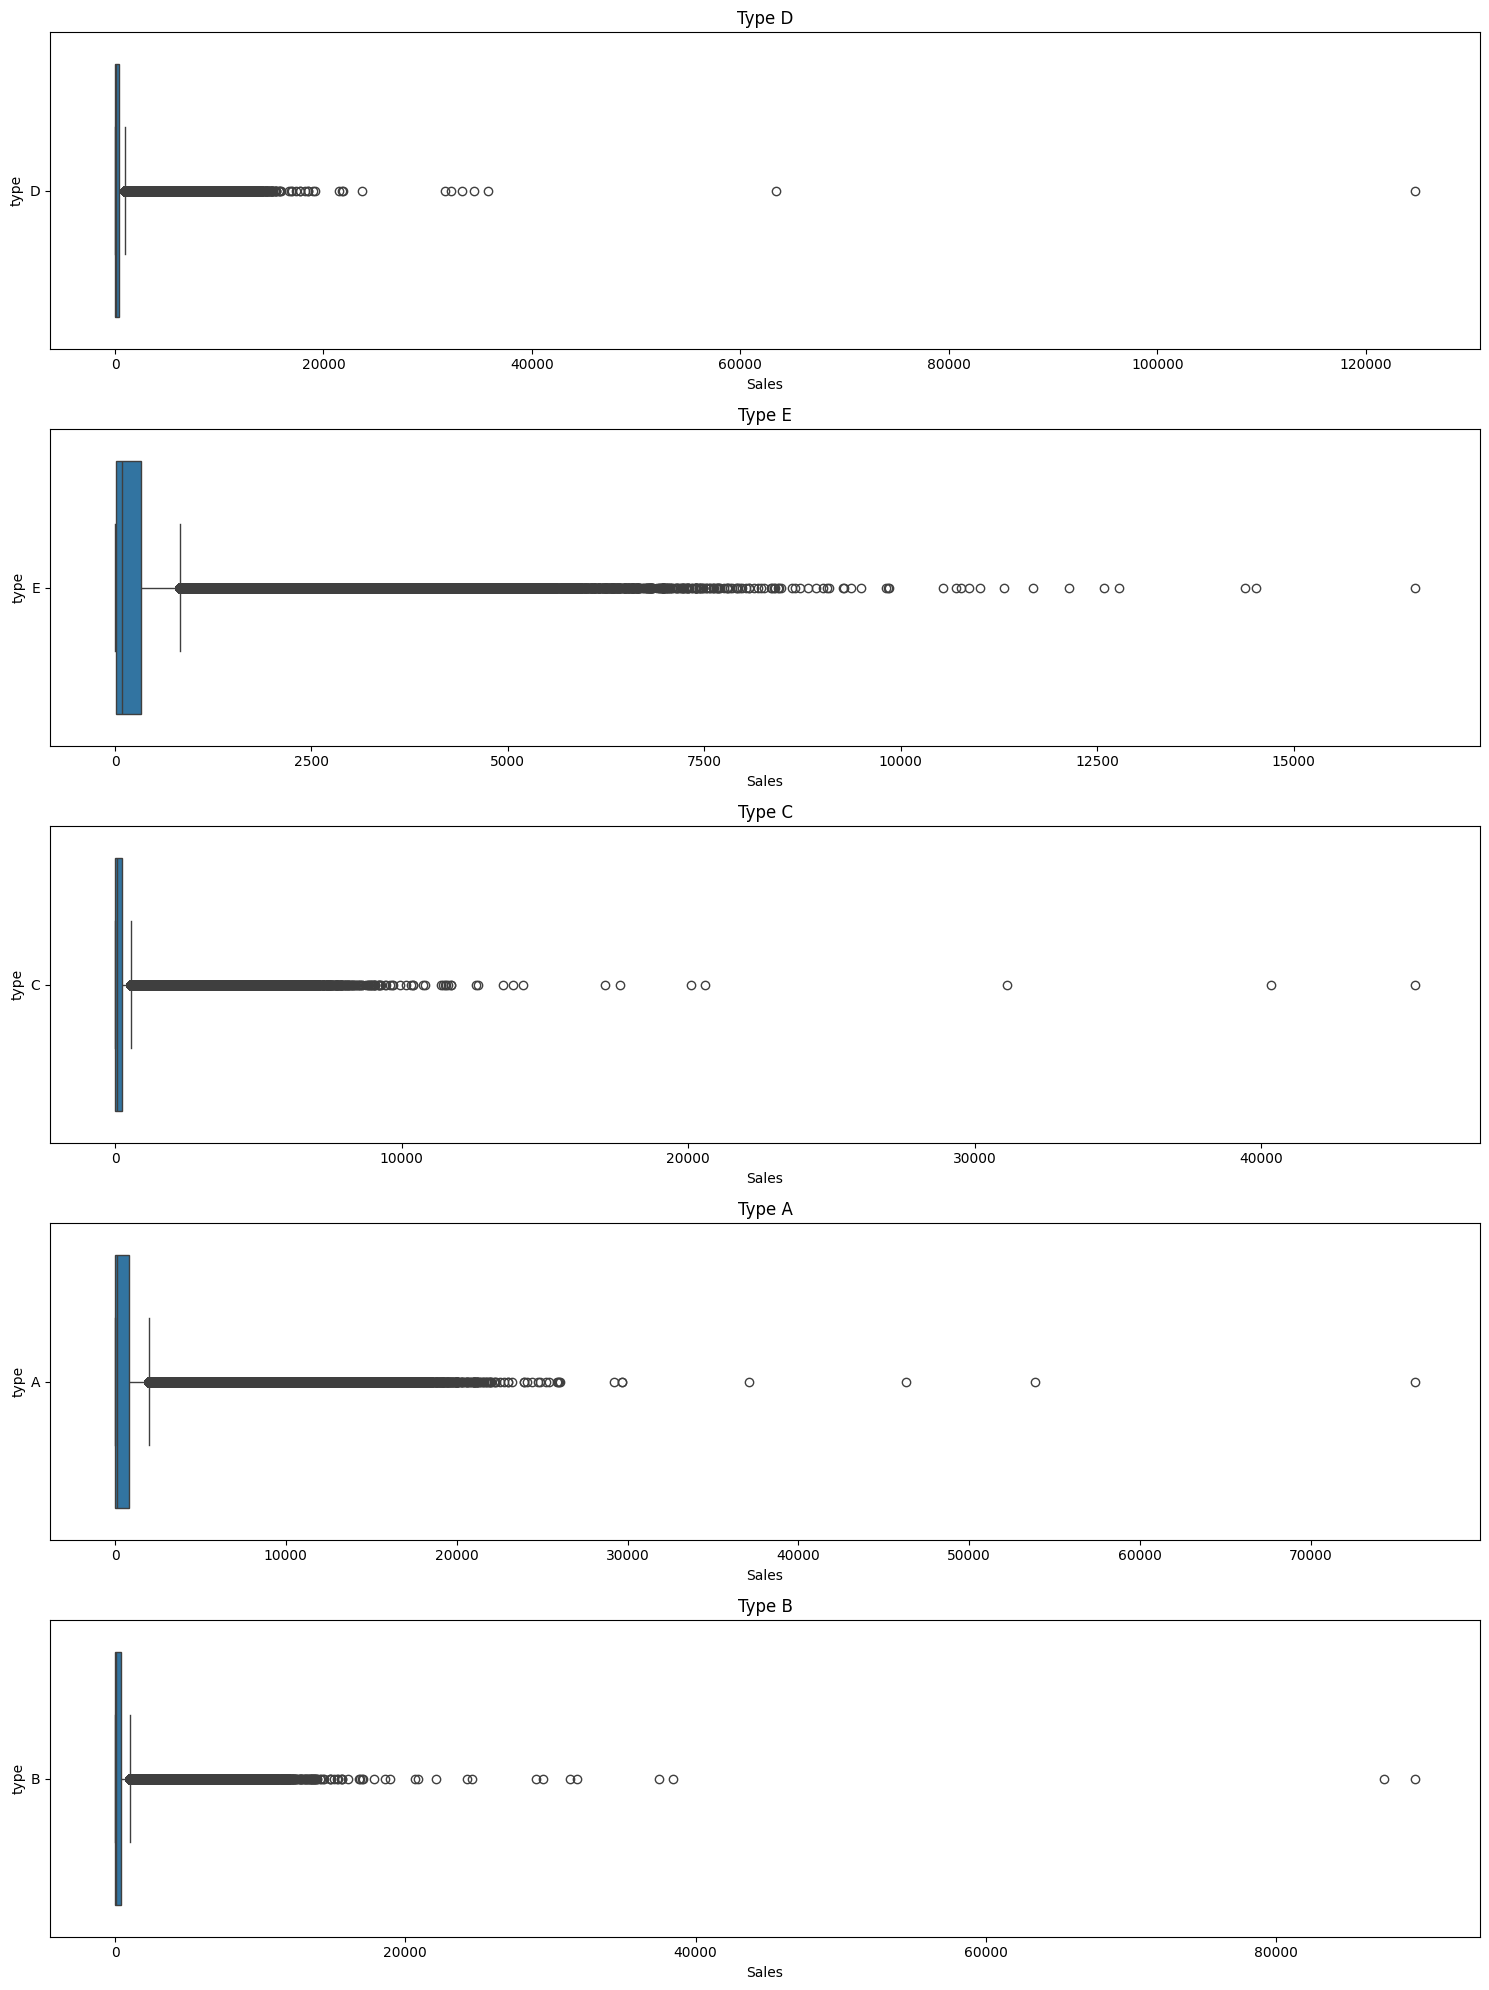

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 20))

# Í∞Å typeÏóê ÎåÄÌïú ÏÉÅÏûê ÏàòÏóº Í∑∏Î¶ºÏùÑ Ìï¥Îãπ ÏÑúÎ∏åÌîåÎ°ØÏóê Í∑∏Î¶º
types = train['type'].unique()
for i, ax in enumerate(axes.flatten()):
    if i < len(types):
        sns.boxplot(x='sales', y='type', data=train[train['type'] == types[i]], ax=ax)
        ax.set_title(f'Type {types[i]}')
        ax.set(xlabel='Sales')

# ÏÑúÎ∏åÌîåÎ°Ø Í∞ÑÏùò Í∞ÑÍ≤© Ï°∞Ï†ï
plt.tight_layout()

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

- Îß§Ïû• typeÎ≥ÑÎ°ú Îß§Ï∂úÏï°Ïóê ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
  - `type`Ïóê Îî∞Îùº Í∞ÅÍ∞Å Îã§Î•∏ Î™®Îç∏ÏùÑ Íµ¨Ï∂ïÌïòÍ∏∞Î°ú Ìï®

In [ ]:
### Îç∞Ïù¥ÌÑ∞Î•º type Î≥ÑÎ°ú Î∂ÑÎ¶¨

typeA = train.loc[train['type'] == 'A', :]
typeB = train.loc[train['type'] == 'B', :]
typeC = train.loc[train['type'] == 'C', :]
typeD = train.loc[train['type'] == 'D', :]
typeE = train.loc[train['type'] == 'E', :]

In [ ]:
### Îç∞Ïù¥ÌÑ∞Î•º type Î≥ÑÎ°ú Î∂ÑÎ¶¨

typeA_te = test.loc[test['type'] == 'A', :]
typeB_te = test.loc[test['type'] == 'B', :]
typeC_te = test.loc[test['type'] == 'C', :]
typeD_te = test.loc[test['type'] == 'D', :]
typeE_te = test.loc[test['type'] == 'E', :]

# **4. EDA(2)**
- typeÎ≥ÑÎ°ú Î∂ÑÎ¶¨ÌïòÏó¨ Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌï¥ Î≥¥Ïûê.

## **4-1. Type A**

In [ ]:
typeA = typeA.drop('type', axis = 1) # Îçî Ïù¥ÏÉÅ type Î≥ÄÏàòÎäî ÌïÑÏöî ÏóÜÏúºÎØÄÎ°ú ÏÇ≠Ï†ú
typeA_te = typeA_te.drop('type', axis = 1) # Îçî Ïù¥ÏÉÅ type Î≥ÄÏàòÎäî ÌïÑÏöî ÏóÜÏúºÎØÄÎ°ú ÏÇ≠Ï†ú

In [ ]:
typeA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360904 entries, 1547 to 2704215
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            360904 non-null  int64         
 1   date          360904 non-null  datetime64[ns]
 2   store_nbr     360904 non-null  int64         
 3   family        360904 non-null  object        
 4   sales         360904 non-null  float64       
 5   onpromotion   360904 non-null  float64       
 6   city          360904 non-null  object        
 7   state         360904 non-null  object        
 8   cluster       360904 non-null  int64         
 9   dcoilwtico    360904 non-null  float64       
 10  transactions  360431 non-null  float64       
 11  holiday       360904 non-null  object        
 12  year          360904 non-null  int64         
 13  quarter       360904 non-null  int64         
 14  month         360904 non-null  int64         
 15  day_of_week  

In [ ]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïùò Í∏∞Ï¥àÌÜµÍ≥ÑÎüâ ÌôïÏù∏

typeA[['sales', 'onpromotion', 'dcoilwtico', 'transactions']].describe()

sales  onpromotion  dcoilwtico  transactions
count 360904.00    360904.00   360904.00     360431.00
mean     978.22         4.17       64.72       3209.21
std     2167.50        16.18       24.90       1041.29
min        1.00         0.00       26.19        292.00
25%       17.00         0.00       45.93       2433.50
50%      139.00         0.00       51.81       3153.00
75%      806.91         1.00       93.81       3891.00
max    76090.00       252.00      110.62       8359.00

- target Î≥ÄÏàòÏù∏ `sales`Îäî ÍµâÏû•Ìûà ÏôúÍ≥°Îêú Î∂ÑÌè¨Î•º Î≥¥Ïù¥Í≥† ÏûàÎã§.
  - `np.log1p()`Î•º ÌÜµÌïú Î°úÍ∑∏ Î≥ÄÌôò ÏàòÌñâ ÌõÑ Î™®Îç∏ÎßÅÌïòÎ©¥ Ï¢ãÏùÑ ÎìØÌïòÎã§.
- `onpromotion` Î≥ÄÏàòÏùò Í≤ΩÏö∞ Ïã¨ÌïòÍ≤å ÏôúÍ≥°Îêú Î∂ÑÌè¨Î•º Í∞ÄÏßÄÍ≥† ÏûàÏùå
  - ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Í≥† Ï†ÑÏ≤òÎ¶¨ Ïú†Î¨¥Î•º Í≤∞Ï†ïÌïòÏûê.


### **üß° store_nbr**

In [ ]:
# Í≥†Ïú†Ìïú Îß§Ïû• Ïàò

typeA['store_nbr'].unique()

array([44, 45, 46, 48, 49, 47, 51, 50, 52])

In [ ]:
### Í∞Å Îß§Ïû•Î≥Ñ Îß§Ï∂ú Ï¥ùÏï° ÏãúÎèÑÌëú(Ïùº Îã®ÏúÑ)

a = typeA.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
px.line(a, x = "date", y= "sales", color = "store_nbr", title = "Daily total sales of the stores_Type A")

- Í∞Å Îß§Ïû•ÎßàÎã§ Îß§Ï∂úÏù¥ ÏÉÅÏù¥Ìïú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
  - 45Î≤à Îß§Ïû•Ïùò Í≤ΩÏö∞ Îß§Ï∂úÏï°Ïù¥ Îã§Î•∏ Îß§Ïû•Ïóê ÎπÑÌï¥ ÌÅ∞ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
  - 52Î≤à Îß§Ïû•Ïùò Í≤ΩÏö∞ ÎπÑÍµêÏ†Å ÏµúÍ∑ºÏóê Í∞úÏû•Ìïú Ï†êÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
  > Î™®Îç∏ÎßÅ Ïãú Îß§Ïû• Î≤àÌò∏Î•º one-hot encoding ÌõÑ Î∞òÏòÅÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÌåêÎã®Îê®

- Í∞ÄÍ≤åÎ≥ÑÎ°ú Îß§Ï∂úÏóê Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
  - Kaggle ÏÑ§Î™ÖÏóê Îî∞Î•¥Î©¥ ÏßÄÏßÑÏùò ÏòÅÌñ•Ïù¥ÎùºÍ≥† Ìï®
  - Í∑∏Îü¨ÎÇò test ÏòàÏ∏° ÏãúÏ†êÏóêÎäî ÏßÄÏßÑÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ï†ÑÌòÄ Ïïå Ïàò x
  > Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÏßÑÌñâ

#### **üìå Ïù¥ÏÉÅÏπò Ï†úÍ±∞**

In [ ]:
typeA.shape

(360904, 16)

ÏõêÎûòÎäî 360904Í±¥Ïùò Îç∞Ïù¥ÌÑ∞

In [ ]:
typeA.groupby('store_nbr')['sales'].describe()

count    mean     std  min   25%    50%     75%      max
store_nbr                                                            
44        45598.00 1361.63 2907.79 1.00 24.00 281.75  997.61 46271.00
45        44814.00 1216.09 2600.66 1.00 20.00 229.45 1017.00 76090.00
46        44835.00  934.45 2062.58 1.00 16.00 113.83  914.09 25238.00
47        45039.00 1131.20 2418.92 1.00 19.00 192.00  934.94 23024.00
48        43723.00  821.84 1842.36 1.00 15.00  96.00  801.00 22255.00
49        44820.00  968.77 2069.87 1.00 17.00 187.00  701.55 21190.00
50        44095.00  649.80 1407.29 1.00 14.00 100.00  550.00 14431.00
51        44390.00  741.42 1475.96 1.00 11.00 146.99  626.52 14179.00
52         3590.00  751.02 1611.02 1.00 12.00  96.84  499.31 10462.00

Í∞í ÏûêÏ≤¥ÎèÑ ÏôúÍ≥°Îêú Î∂ÑÌè¨Î•º Î≥¥ÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

In [ ]:
### Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Ìï®Ïàò

def get_outlier_indices(df_col, weight=1.5):
  q1, q3 = np.percentile(df_col, [25, 75])

  iqr = q3 - q1
  iqr_weight = iqr * weight # iqrÏùò 1.5Î∞∞ Î≤îÏúÑÎ•º Î≤óÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Ïù¥ÏÉÅÏπòÎ°ú Ï≤òÎ¶¨

  lowest_val, highest_val = q1 - iqr_weight, q3 + iqr_weight # ÏÉÅÌïú, ÌïòÌïú

  outlier_indices = df_col[(df_col < lowest_val) | (df_col > highest_val)].index # Ïù¥ÏÉÅÏπòÏóê Ìï¥ÎãπÌïòÎäî Îç∞Ïù¥ÌÑ∞ idx

  return outlier_indices

In [ ]:
cols = ['store_nbr', 'family']

# Ï†úÍ±∞Ìï† Ìñâ(row)Ïùò Ïù∏Îç±Ïä§Î•º Ï†ÄÏû•
rows_to_drop = []

for col in cols:
    # 'store_nbr', 'family'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º Í∑∏Î£πÌôî
    grouped = typeA.groupby(cols)
    # Í∞Å Í∑∏Î£πÏóê ÎåÄÌï¥ Ïù¥ÏÉÅÏπòÎ•º Ï∞æÏïÑÎÇ¥Í≥† Ïù∏Îç±Ïä§Î•º Ï∂îÍ∞Ä
    for (_, group_data) in grouped:
        outlier_indices = get_outlier_indices(group_data['sales'], weight=3)
        rows_to_drop.extend(outlier_indices)

# Ïù¥ÏÉÅÏπò Ï†úÍ±∞
typeA = typeA.drop(rows_to_drop)

In [ ]:
typeA.shape

(357838, 16)

329692Í±¥ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Í∞Ä Í∞êÏÜå

In [ ]:
typeA.groupby(['store_nbr', 'family'])['sales'].describe()

count    mean     std     min     25%  \
store_nbr family                                                               
44        AUTOMOTIVE                 1676.00   18.82    9.37    1.00   12.00   
          BEAUTY                     1665.00   11.58    7.41    1.00    6.00   
          BEVERAGES                  1678.00 7981.20 3844.07 1804.00 4659.50   
          BOOKS                       164.00    2.80    2.30    1.00    1.00   
          BREAD/BAKERY               1679.00 1389.55  476.69  361.97 1035.99   
...                                      ...     ...     ...     ...     ...   
52        POULTRY                     118.00  494.60  124.87  234.27  389.73   
          PREPARED FOODS              118.00  135.18   30.27   73.99  112.15   
          PRODUCE                     118.00 4925.07 1314.25 3085.14 3915.15   
          SCHOOL AND OFFICE SUPPLIES   97.00    6.72    5.95    1.00    3.00   
          SEAFOOD                     117.00   10.04    5.44    2.00    6.00   

                                         50%     75%      max  
store_nbr family                                               
44        AUTOMOTIVE                   17.00   25.00    64.00  
          BEAUTY                       10.00   15.00    42.00  
          BEVERAGES                  7588.00 9610.25 22770.00  
          BOOKS                         2.00    4.00    13.00  
          BREAD/BAKERY               1298.31 1648.81  3361.50  
...                                      ...     ...      ...  
52        POULTRY                     493.94  583.71   775.52  
          PREPARED FOODS              134.59  150.72   231.00  
          PRODUCE                    4639.78 5615.25  8154.47  
          SCHOOL AND OFFICE SUPPLIES    5.00    8.00    32.00  
          SEAFOOD                       8.50   12.00    25.78  

[287 rows x 8 columns]

In [ ]:
a = typeA.set_index("date").groupby("store_nbr").resample("D").sales.sum().reset_index()
px.line(a, x = "date", y= "sales", color = "store_nbr", title = "Daily total sales of the stores_Type A")

Ïù¥ÏÉÅÏπòÍ∞Ä Ïñ¥ÎäêÏ†ïÎèÑÎäî Ï†úÍ±∞Îêú Í≤É Í∞ôÎã§.

### **üíõ family**

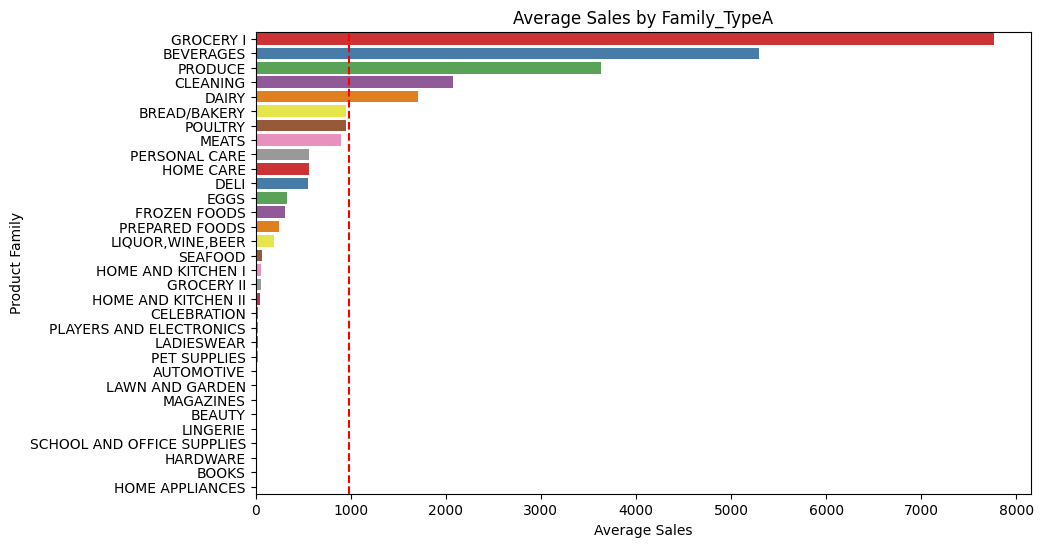

In [ ]:
### Í∞Å ÌíàÎ™©Î≥ÑÎ°ú Îß§Ï∂úÏóê ÎØ∏ÏπòÎäî ÏòÅÌñ•

# Í∞Å family Î≥ÑÎ°ú 'sales'Ïùò ÌèâÍ∑†ÏùÑ Í≥ÑÏÇ∞ÌïòÍ≥†, ÎÇ¥Î¶ºÏ∞®ÏàúÏúºÎ°ú Ï†ïÎ†¨
average_sales_by_family = typeA.groupby('family')['sales'].mean().sort_values(ascending=False)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
# palette Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í∞Å ÎßâÎåÄÏóê Îã§Î•∏ ÏÉâÏÉÅ Ï†ÅÏö©
sns.barplot(x='sales', y='family', data=typeA, order=average_sales_by_family.index, ci=None, palette='Set1')
plt.axvline(x=typeA['sales'].mean(), color='red', linestyle='--') # Îß§Ï∂ú Ï†ÑÏ≤¥ ÌèâÍ∑†

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Average Sales by Family_TypeA')
plt.xlabel('Average Sales')
plt.ylabel('Product Family')
plt.show()

- `groceryI`Í≥º `beverage`Í∞Ä Îß§Ï∂úÏùò ÎåÄÎ∂ÄÎ∂ÑÏùÑ Ï∞®ÏßÄÌïúÎã§.
> Î™®Îç∏ÎßÅ Ïãú Ï†úÌíàÍµ∞ÏùÑ one-hot encoding ÌõÑ Î∞òÏòÅÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÑ Í≤ÉÏù¥ÎùºÍ≥† ÌåêÎã®Îê®

### **üíö onpromotion**

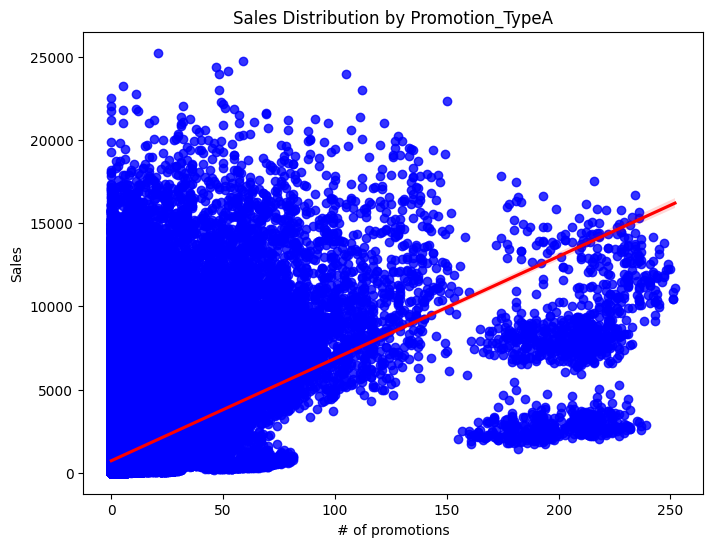

In [ ]:
plt.figure(figsize=(8, 6))

sns.regplot(x='onpromotion', y='sales', data=typeA, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Sales Distribution by Promotion_TypeA')
plt.xlabel('# of promotions')
plt.ylabel('Sales')
plt.show()

- ÍΩ§ÎÇò Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.
  - ÏùºÎ∂Ä Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÏñ¥ÏÑú Í∑∏Îü∞ Í≤É Í∞ôÍ∏∞ÎèÑ ÌïòÎã§..
- promotionÎêòÎäî Ï†úÌíà ÏàòÏôÄ ÏÉÅÍ¥Ä ÏóÜÏù¥ Îß§Ï∂úÏï°Ïù¥ ÌÅ∞ Í≤ΩÏö∞Îì§Ïù¥ Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### **üíô state**

In [ ]:
# Í≥†Ïú†Ìïú Ï£º(state) Ïàò

typeA['state'].unique()

array(['Pichincha', 'Guayas', 'Tungurahua', 'Manabi'], dtype=object)

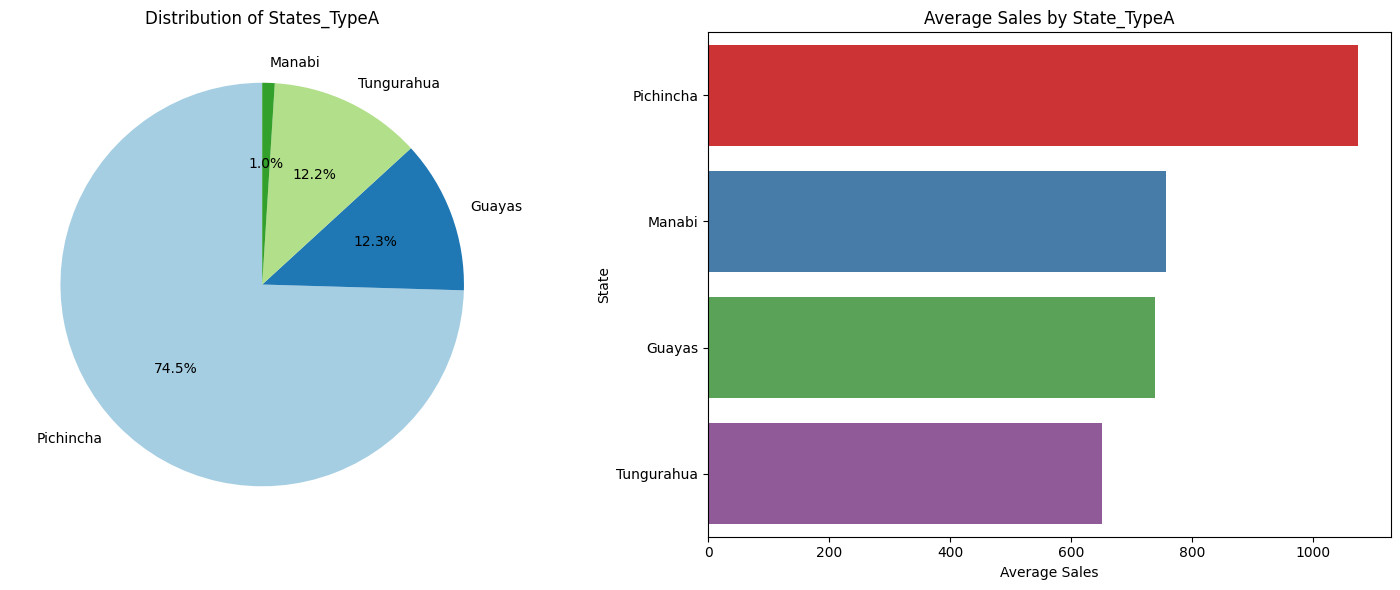

In [ ]:
plt.figure(figsize=(15, 6))

# Ï≤´ Î≤àÏß∏ subplot: ÌååÏù¥ Ï∞®Ìä∏
plt.subplot(1, 2, 1)
state_counts = typeA['state'].value_counts()
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of States_TypeA')

# Îëê Î≤àÏß∏ subplot: ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
average_sales_by_state = typeA.groupby('state')['sales'].mean().sort_values(ascending=False)
sns.barplot(x='sales', y='state', data=typeA, order=average_sales_by_state.index, ci=None, palette='Set1')

plt.title('Average Sales by State_TypeA')
plt.xlabel('Average Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

- Ï£ºÎßàÎã§ Îß§Ï∂úÏï°Ïóê Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
- **Manabi** Ï£ºÏùò Í≤ΩÏö∞ ÍµâÏû•Ìûà Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞ Í±¥ÏàòÏûÑÏóêÎèÑ Î∂àÍµ¨ÌïòÍ≥† Îß§Ï∂úÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### **üíú city**

In [ ]:
# Í≥†Ïú†Ìïú ÎèÑÏãú(city) Ïàò

print(typeA.groupby('state')['store_nbr'].unique())
print()
print(typeA.groupby('state')['city'].unique())

state
Guayas                            [51]
Manabi                            [52]
Pichincha     [44, 45, 46, 48, 49, 47]
Tungurahua                        [50]
Name: store_nbr, dtype: object

state
Guayas        [Guayaquil]
Manabi            [Manta]
Pichincha         [Quito]
Tungurahua       [Ambato]
Name: city, dtype: object


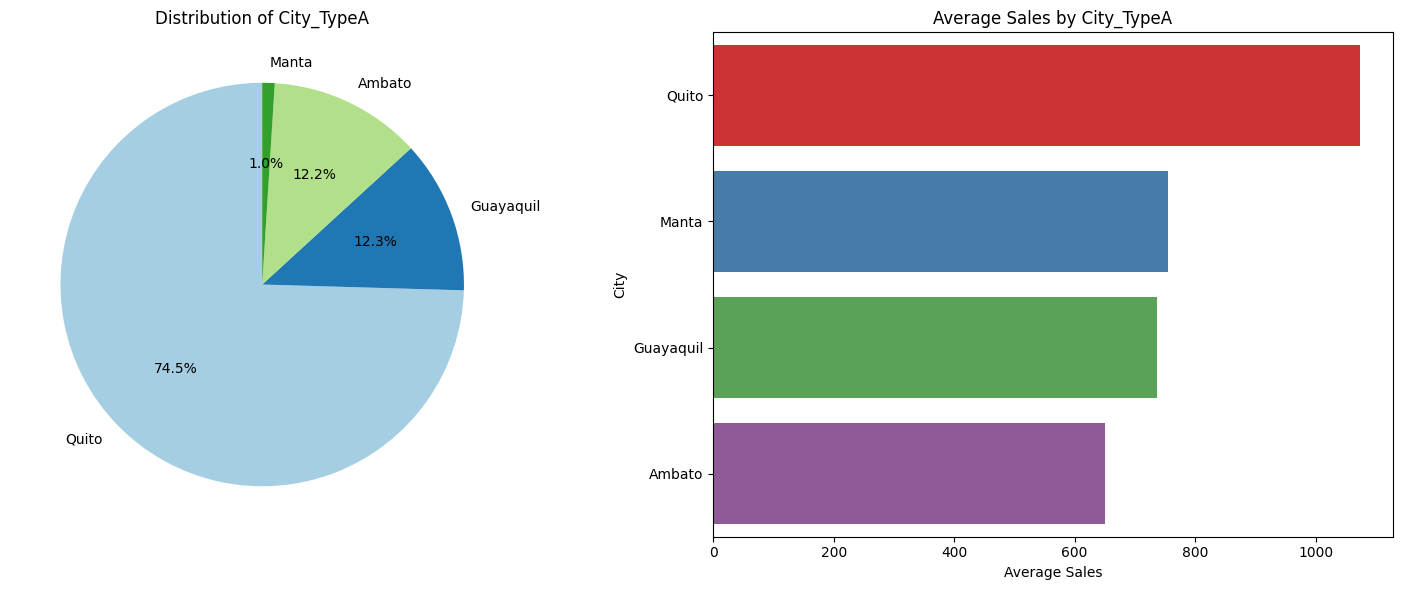

In [ ]:
plt.figure(figsize=(15, 6))

# Ï≤´ Î≤àÏß∏ subplot: ÌååÏù¥ Ï∞®Ìä∏
plt.subplot(1, 2, 1)
city_counts = typeA['city'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of City_TypeA')

# Îëê Î≤àÏß∏ subplot: ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
average_sales_by_city = typeA.groupby('city')['sales'].mean().sort_values(ascending=False)
sns.barplot(x='sales', y='city', data=typeA, order=average_sales_by_city.index, ci=None, palette='Set1')

plt.title('Average Sales by City_TypeA')
plt.xlabel('Average Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

- `state`Î•º ÌÜµÌï¥ `city`Í∞Ä Îã§ Íµ¨Î∂ÑÎêòÎäî ÏÉÅÌô©
  - `sales`Ïùò ÏñëÏÉÅÏù¥ `state`ÏôÄ Ïú†ÏÇ¨
  - `state` Î≥ÄÏàò ÌïòÎÇòÎßå ÎÇ®Í∏∞Í∏∞Î°ú Í≤∞Ï†ï

### **ü§édcoilwtico**

In [ ]:
import plotly.express as px

daily_oil_price = typeA.groupby("date")["dcoilwtico"].mean().reset_index()

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig = px.line(daily_oil_price, x="date", y="dcoilwtico", title="Daily DcoilWTICO Prices")
fig.show()

- Ïú†Í∞Ä Î≥ÄÎèô Í≤ΩÌñ•Í≥º salesÏùò Î≥ÄÎèôÏù¥ Î≥Ñ ÏÉÅÍ¥ÄÏùÄ ÏóÜÏñ¥ Î≥¥Ïù∏Îã§.(Ï∂îÏÑ∏Í∞Ä Îã§Î¶Ñ)
- 2014ÎÖÑÏùÑ Í∏∞Ï†êÏúºÎ°ú Í∏âÍ≤©ÌïòÍ≤å Í∞êÏÜåÌïòÎäî Ï∂îÏÑ∏Î•º Î≥¥Ïù∏Îã§.
  - Í∑∏Ïóê ÎπÑÌï¥ Îß§Ï∂úÏùÄ Í∑∏Î†áÍ≤å Ïò§Î•¥ÏßÄ ÏïäÏïòÎã§.

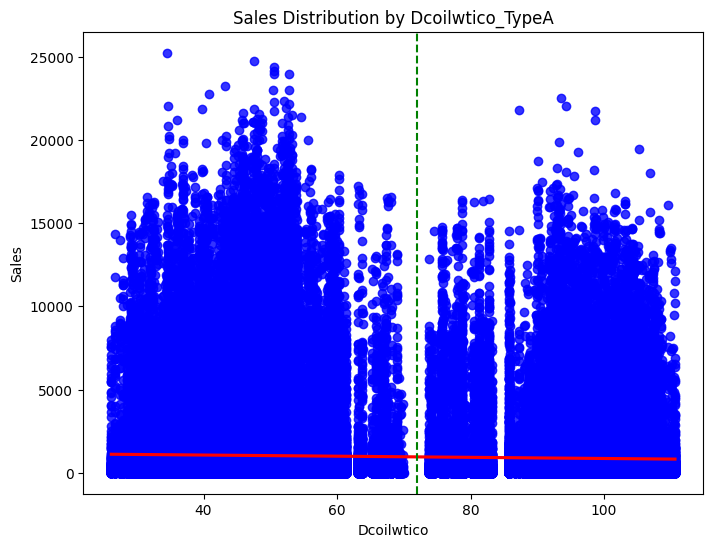

In [ ]:
plt.figure(figsize=(8, 6))

sns.regplot(x='dcoilwtico', y='sales', data=typeA, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.axvline(x=72, color='green', linestyle='--') # 72 Íµ¨Î∂ÑÏÑ†

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Sales Distribution by Dcoilwtico_TypeA')
plt.xlabel('Dcoilwtico')
plt.ylabel('Sales')
plt.show()

- Îß§Ïö∞ ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.
- Îã§Îßå Ïú†Í∞ÄÍ∞Ä **72** Ï†ÑÌõÑÏóêÏÑú Îëê Í∞úÏùò Í∑∏Î£πÏúºÎ°ú ÌôïÏó∞Ìûà Î∂ÑÎ¶¨ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [ ]:
under72 = typeA.loc[typeA['dcoilwtico'] <= 72,:]
over72 = typeA.loc[typeA['dcoilwtico'] > 72,:]

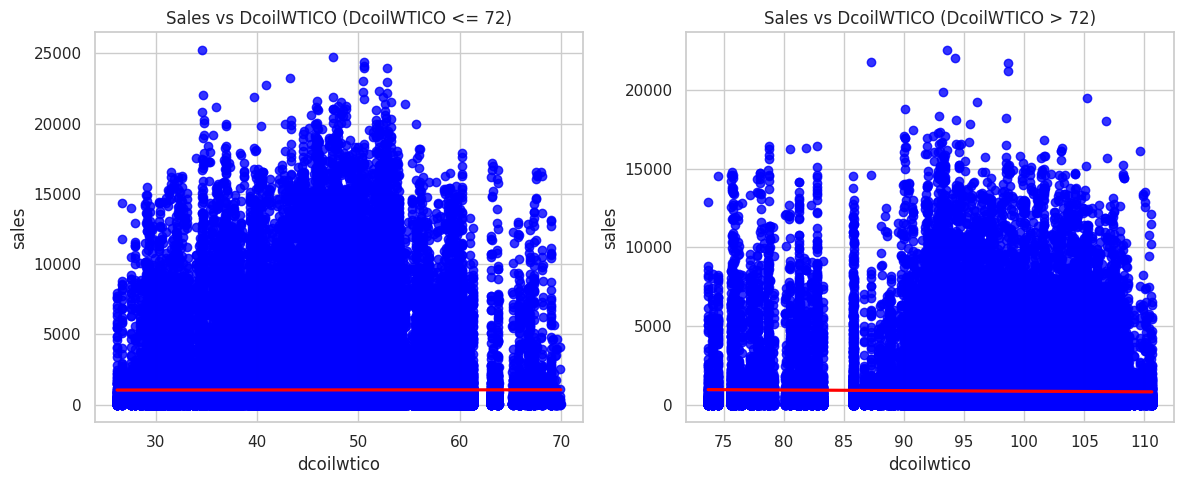

In [ ]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot regplot for 'dcoilwtico' <= 72
sns.regplot(x='dcoilwtico', y='sales', data=under72, ax=axes[0], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[0].set_title('Sales vs DcoilWTICO (DcoilWTICO <= 72)')

# Plot regplot for 'dcoilwtico' > 72
sns.regplot(x='dcoilwtico', y='sales', data=over72, ax=axes[1], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
axes[1].set_title('Sales vs DcoilWTICO (DcoilWTICO > 72)')

# Adjust layout
plt.tight_layout()
plt.show()

- Ï∞®Ïù¥Í∞Ä ÎÇòÌÉÄÎÇòÏßÑ ÏïäÎäîÎã§..

### **üíó transactions**

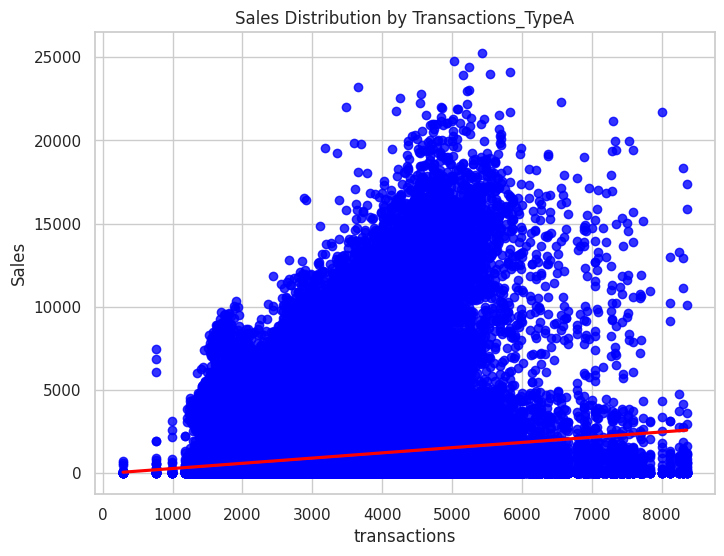

In [ ]:
plt.figure(figsize=(8, 6))

sns.regplot(x='transactions', y='sales', data=typeA, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.title('Sales Distribution by Transactions_TypeA')
plt.xlabel('transactions')
plt.ylabel('Sales')
plt.show()

- ÏïΩÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î≥¥Ïù∏Îã§.
  - Í∑∏Îü¨ÎÇò Î™®Îç∏ÎßÅ Ïãú ÌôúÏö©ÌïòÍ∏∞ Ïñ¥Î†§ÏõÄ..

### **ü§ç holiday**

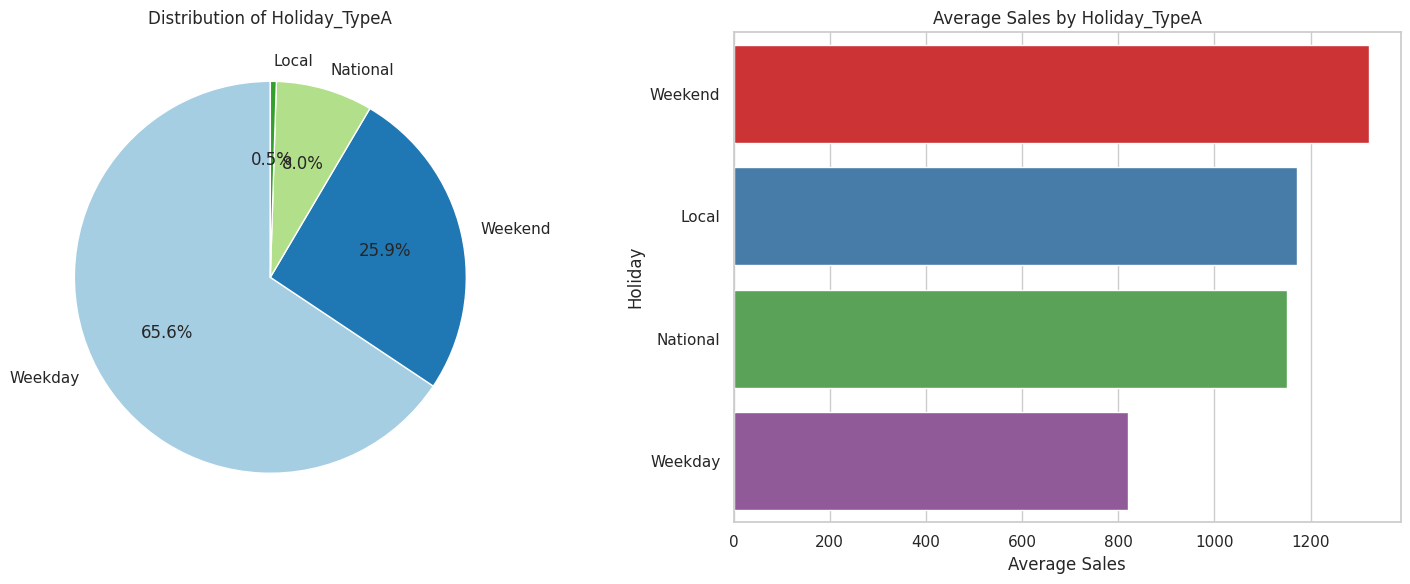

In [ ]:
plt.figure(figsize=(15, 6))

# Ï≤´ Î≤àÏß∏ subplot: ÌååÏù¥ Ï∞®Ìä∏
plt.subplot(1, 2, 1)
holiday_counts = typeA['holiday'].value_counts()
plt.pie(holiday_counts, labels=holiday_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Holiday_TypeA')

# Îëê Î≤àÏß∏ subplot: ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.subplot(1, 2, 2)
average_sales_by_holiday = typeA.groupby('holiday')['sales'].mean().sort_values(ascending=False)
sns.barplot(x='sales', y='holiday', data=typeA, order=average_sales_by_holiday.index, ci=None, palette='Set1')

plt.title('Average Sales by Holiday_TypeA')
plt.xlabel('Average Sales')
plt.ylabel('Holiday')
plt.tight_layout()
plt.show()

- Í∑∏ÎÉ• Ï£ºÎßê(Í≥µÌú¥ÏùºÏùÄ Ï†úÏô∏Îê®)Ïóê Îß§Ï∂úÏù¥ Í∞ÄÏû• Ï¢ãÎã§.

### **‚≠êTarget Î≥ÄÏàò(Sales)**
- Ïó¨Îü¨ ÏöîÏù∏Ïóê Îî∞Îùº Îß§Ï∂úÏù¥ Ïñ¥ÎñªÍ≤å Îã¨ÎùºÏßÄÎäîÏßÄ ÏÇ¥Ìé¥Î≥¥Ïûê.

#### **a) ÏãúÍ∞Ñ Í¥ÄÎ†® Î≥ÄÏàò**

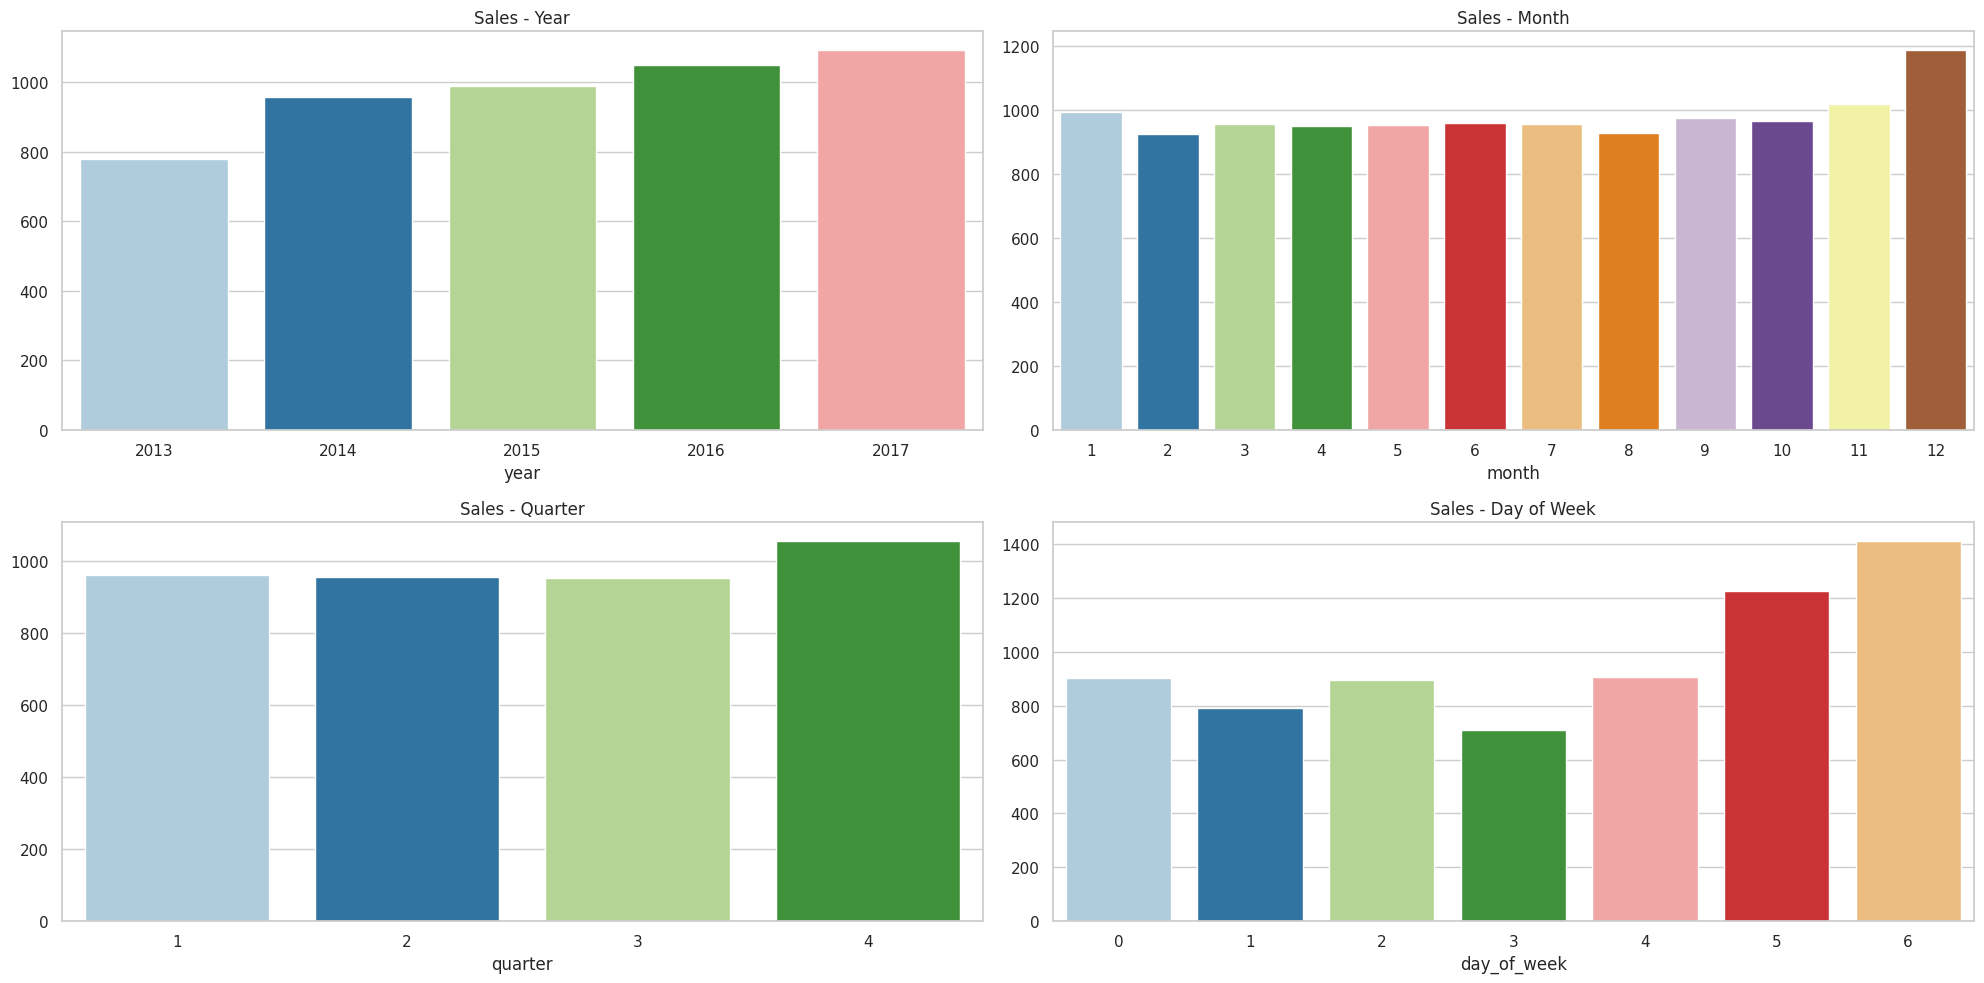

In [ ]:
### ÌèâÍ∑† Îß§Ï∂úÏï°ÏúºÎ°ú ÏãúÍ∞ÅÌôî
data_grouped_year = typeA.groupby(['year']).mean()['sales']
data_grouped_month = typeA.groupby(['month']).mean()['sales']
data_grouped_quarter = typeA.groupby(['quarter']).mean()['sales']
data_grouped_day = typeA.groupby(['day_of_week']).mean()['sales']

palette = sns.color_palette("Paired")

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# Ïó∞ÎèÑÎ≥Ñ Îß§Ï∂ú
axes[0, 0].set_title('Sales - Year')
sns.barplot(x=data_grouped_year.index, y=data_grouped_year.values, ax=axes[0, 0], palette=palette)
# ÏõîÎ≥Ñ Îß§Ï∂ú
axes[0, 1].set_title('Sales - Month')
sns.barplot(x=data_grouped_month.index, y=data_grouped_month.values, ax=axes[0, 1], palette=palette)
# Î∂ÑÍ∏∞Î≥Ñ Îß§Ï∂ú
axes[1, 0].set_title('Sales - Quarter')
sns.barplot(x=data_grouped_quarter.index, y=data_grouped_quarter.values, ax=axes[1, 0], palette=palette)
# ÏöîÏùºÎ≥Ñ Îß§Ï∂ú
axes[1, 1].set_title('Sales - Day of Week')
sns.barplot(x=data_grouped_day.index, y=data_grouped_day.values, ax=axes[1, 1], palette=palette)

plt.tight_layout()
plt.show()

In [ ]:
typeA.groupby('year')['sales'].describe()

count    mean     std  min   25%    50%    75%      max
year                                                           
2013 59772.00  778.98 1588.06 1.00 15.71 237.00 754.00 22534.00
2014 75270.00  956.09 2035.00 1.00 14.00 151.14 842.00 21785.00
2015 77989.00  989.39 2147.21 1.00 16.00 132.77 848.96 25238.00
2016 86620.00 1048.01 2357.09 1.00 17.00 100.00 794.51 22770.00
2017 58187.00 1090.88 2492.40 1.00 18.00  97.36 786.00 24744.00

**Ïó∞ÎèÑÎ≥Ñ Îß§Ï∂ú**
- Îí§Î°ú Í∞àÏàòÎ°ù Îß§Ï∂úÏï° ÌèâÍ∑†ÏùÄ Ï†êÏ†ê Í∞êÏÜåÌïòÍ≥† ÏûàÎã§.
  - Ïù¥ÏÉÅÏπò Ï†úÍ±∞Î°ú Ïù∏Ìïú ÌòÑÏÉÅÏù¥ÎùºÍ≥† ÌåêÎã®Îê®
  - Îß§Ï∂úÏï° Îã®Ïùº Í∞í ÏûêÏ≤¥Îäî 2017ÎÖÑÏúºÎ°ú Í∞àÏàòÎ°ù ÎåÄÏ≤¥Î°ú ÎÜíÏïÑÏßÑÎã§.

**ÏõîÎ≥Ñ & Î∂ÑÍ∏∞Î≥Ñ Îß§Ï∂ú**  
- ÎåÄÏ≤¥Î°ú ÎπÑÏä∑Ìïú Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥ÎÇò, 12ÏõîÏóê Îß§Ï∂úÏù¥ Ï¶ùÍ∞Ä
- Î∂ÑÍ∏∞Î≥Ñ Îß§Ï∂ú ÌèâÍ∑†ÏùÄ ÎπÑÏä∑ÌïòÎÇò 3Î∂ÑÍ∏∞Í∞Ä ÏïΩÍ∞Ñ ÎÇÆÏùå

**ÏöîÏùºÎ≥Ñ Îß§Ï∂ú**  
- ÌèâÏùºÏóê ÎπÑÌï¥ Í∏àÏöîÏùº, Ï£ºÎßêÏùò Îß§Ï∂úÏï°Ïù¥ Îçî ÎÜíÎã§.

#### **b) Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**
- ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî ÏàòÏπòÌòï Î≥ÄÏàòÎì§ÎÅºÎ¶¨Îßå ÎπÑÍµê Í∞ÄÎä•

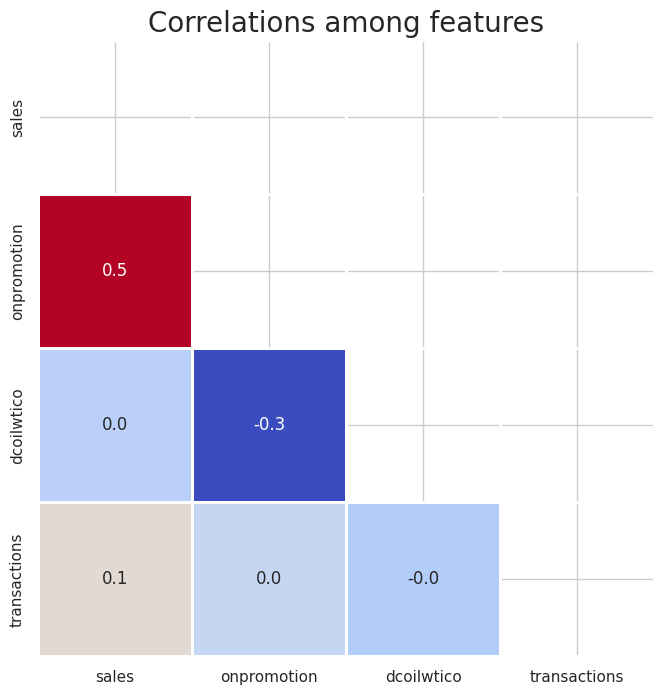

In [ ]:
num_ftrs = typeA[['sales', 'onpromotion','dcoilwtico','transactions']]

mask = np.triu(num_ftrs.corr(method = 'spearman'))

# heatmapÏùÑ Ïù¥Ïö©Ìïú ÏãúÍ∞ÅÌôî
plt.figure(figsize=(8, 8))
sns.heatmap(num_ftrs.corr(method = 'spearman'),
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)
plt.title("Correlations among features", fontsize=20)
plt.show()

### **üí° ÌõÑÏ≤òÎ¶¨**

#### **ÏµúÏ¢Ö Î≥ÄÏàò ÏÑ†ÌÉù**

In [ ]:
typeA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357838 entries, 1547 to 2704215
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            357838 non-null  int64         
 1   date          357838 non-null  datetime64[ns]
 2   store_nbr     357838 non-null  int64         
 3   family        357838 non-null  object        
 4   sales         357838 non-null  float64       
 5   onpromotion   357838 non-null  float64       
 6   city          357838 non-null  object        
 7   state         357838 non-null  object        
 8   cluster       357838 non-null  int64         
 9   dcoilwtico    357838 non-null  float64       
 10  transactions  357367 non-null  float64       
 11  holiday       357838 non-null  object        
 12  year          357838 non-null  int64         
 13  quarter       357838 non-null  int64         
 14  month         357838 non-null  int64         
 15  day_of_week  

In [ ]:
typeA = typeA[['store_nbr', 'family', 'sales', 'onpromotion', 'state', 'cluster', 'dcoilwtico', 'holiday', 'year', 'quarter', 'month', 'day_of_week']]

# testÏùò Í≤ΩÏö∞ÏóêÎäî Ïù¥ÌõÑ submission ÌååÏùº ÏûëÏÑ±ÏùÑ ÏúÑÌï¥ ÏùºÎã® idÎ•º ÎÇ®Í≤®ÎëêÍ∏∞Î°ú Í≤∞Ï†ï
typeA_te = typeA_te[['id', 'store_nbr', 'family', 'onpromotion', 'state', 'cluster', 'dcoilwtico', 'holiday', 'year', 'quarter', 'month', 'day_of_week']]

In [ ]:
typeA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357838 entries, 1547 to 2704215
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   store_nbr    357838 non-null  int64  
 1   family       357838 non-null  object 
 2   sales        357838 non-null  float64
 3   onpromotion  357838 non-null  float64
 4   state        357838 non-null  object 
 5   cluster      357838 non-null  int64  
 6   dcoilwtico   357838 non-null  float64
 7   holiday      357838 non-null  object 
 8   year         357838 non-null  int64  
 9   quarter      357838 non-null  int64  
 10  month        357838 non-null  int64  
 11  day_of_week  357838 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.5+ MB


#### **Train/Validation Split**

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(typeA, test_size=0.3, random_state=42, stratify=typeA[['store_nbr', 'family']]) # Í∞ÄÍ≤åÎ≥Ñ, Ï†úÌíàÍµ∞Î≥Ñ ÎπÑÏú® Ïú†ÏßÄ

In [ ]:
train.shape

(250486, 12)

In [ ]:
val.shape

(107352, 12)

#### **Î≥ÄÏàò ÏôúÍ≥° Ï†ïÎèÑ ÌôïÏù∏**

In [ ]:
# ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ÏÑúÎßå ÏôúÎèÑ ÌôïÏù∏

train[['sales', 'onpromotion','dcoilwtico']].skew()

sales         3.77
onpromotion   7.99
dcoilwtico    0.53
dtype: float64

In [ ]:
train['sales'] = np.log1p(train['sales'])
train['onpromotion'] = np.log1p(train['onpromotion'])

In [ ]:
train[['sales', 'onpromotion','dcoilwtico']].skew()

sales         0.01
onpromotion   2.05
dcoilwtico    0.53
dtype: float64

- ÏôúÍ≥° Ï†ïÎèÑÍ∞Ä ÎßéÏù¥ Í∞úÏÑ†ÎêòÏóàÎã§.

In [ ]:
val['onpromotion'] = np.log1p(val['onpromotion'])
typeA_te['onpromotion'] = np.log1p(typeA_te['onpromotion'])

#### **Ïä§ÏºÄÏùºÎßÅ**
- ÏàòÏπòÌòï Î≥ÄÏàòÎì§Ïóê ÎåÄÌïú Ïä§ÏºÄÏùºÎßÅ ÏßÑÌñâ

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected variables
train[['onpromotion', 'dcoilwtico']] = scaler.fit_transform(train[['onpromotion', 'dcoilwtico']])
val[['onpromotion', 'dcoilwtico']] = scaler.transform(val[['onpromotion', 'dcoilwtico']])
typeA_te[['onpromotion', 'dcoilwtico']] = scaler.transform(typeA_te[['onpromotion', 'dcoilwtico']])

In [ ]:
train.head()

store_nbr         family  sales  onpromotion       state  cluster  \
1628410         45      GROCERY I   9.10         3.36   Pichincha       11   
576149          50  PERSONAL CARE   5.72        -0.54  Tungurahua       14   
392392          51          DAIRY   7.00        -0.54      Guayas       17   
2612463         47        POULTRY   7.29         3.00   Pichincha       14   
803172          44      GROCERY I   8.63        -0.54   Pichincha        5   

         dcoilwtico   holiday  year  quarter  month  day_of_week  
1628410       -1.03   Weekday  2015        4     11            0  
576149         1.19   Weekday  2014        1      1            1  
392392         1.59   Weekend  2013        3      9            5  
2612463       -0.88   Weekday  2017        2      6            4  
803172         1.73  National  2014        2      6            4

In [ ]:
val.head()

store_nbr            family  sales  onpromotion       state  cluster  \
2361956         45        AUTOMOTIVE  27.00         0.11   Pichincha       11   
2044459         45     PERSONAL CARE 617.00         1.41   Pichincha       11   
2481507         50      FROZEN FOODS 255.08         0.76  Tungurahua       14   
2098843         44              EGGS 597.00         2.71   Pichincha        5   
2026657         49  LIQUOR,WINE,BEER 201.00        -0.54   Pichincha       11   

         dcoilwtico  holiday  year  quarter  month  day_of_week  
2361956       -0.47  Weekend  2017        1      1            5  
2044459       -0.90  Weekday  2016        3      7            0  
2481507       -0.50  Weekend  2017        2      4            5  
2098843       -0.69  Weekday  2016        3      8            4  
2026657       -0.77  Weekday  2016        3      7            3

In [ ]:
typeA_te.head()

id  store_nbr      family  onpromotion      state  cluster  \
1254  3002142         44  AUTOMOTIVE        -0.54  Pichincha        5   
1255  3002143         44   BABY CARE        -0.54  Pichincha        5   
1256  3002144         44      BEAUTY         0.49  Pichincha        5   
1257  3002145         44   BEVERAGES         2.44  Pichincha        5   
1258  3002146         44       BOOKS        -0.54  Pichincha        5   

      dcoilwtico  holiday  year  quarter  month  day_of_week  
1254       -0.72  Weekday  2017        3      8            2  
1255       -0.72  Weekday  2017        3      8            2  
1256       -0.72  Weekday  2017        3      8            2  
1257       -0.72  Weekday  2017        3      8            2  
1258       -0.72  Weekday  2017        3      8            2

#### **Î≤îÏ£ºÌòï Î≥ÄÏàò Ï≤òÎ¶¨**

In [ ]:
train = pd.get_dummies(train, columns=['store_nbr','family', 'state', 'cluster', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
train.head()

sales  onpromotion  dcoilwtico  store_nbr_44  store_nbr_45  \
1628410   9.10         3.36       -1.03             0             1   
576149    5.72        -0.54        1.19             0             0   
392392    7.00        -0.54        1.59             0             0   
2612463   7.29         3.00       -0.88             0             0   
803172    8.63        -0.54        1.73             1             0   

         store_nbr_46  store_nbr_47  store_nbr_48  store_nbr_49  store_nbr_50  \
1628410             0             0             0             0             0   
576149              0             0             0             0             1   
392392              0             0             0             0             0   
2612463             0             1             0             0             0   
803172              0             0             0             0             0   

         store_nbr_51  store_nbr_52  family_AUTOMOTIVE  family_BEAUTY  \
1628410             0             0                  0              0   
576149              0             0                  0              0   
392392              1             0                  0              0   
2612463             0             0                  0              0   
803172              0             0                  0              0   

         family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  \
1628410                 0             0                    0   
576149                  0             0                    0   
392392                  0             0                    0   
2612463                 0             0                    0   
803172                  0             0                    0   

         family_CELEBRATION  family_CLEANING  family_DAIRY  family_DELI  \
1628410                   0                0             0            0   
576149                    0                0             0            0   
392392                    0                0             1            0   
2612463                   0                0             0            0   
803172                    0                0             0            0   

         family_EGGS  family_FROZEN FOODS  family_GROCERY I  \
1628410            0                    0                 1   
576149             0                    0                 0   
392392             0                    0                 0   
2612463            0                    0                 0   
803172             0                    0                 1   

         family_GROCERY II  family_HARDWARE  family_HOME AND KITCHEN I  \
1628410                  0                0                          0   
576149                   0                0                          0   
392392                   0                0                          0   
2612463                  0                0                          0   
803172                   0                0                          0   

         family_HOME AND KITCHEN II  family_HOME APPLIANCES  family_HOME CARE  \
1628410                           0                       0                 0   
576149                            0                       0                 0   
392392                            0                       0                 0   
2612463                           0                       0                 0   
803172                            0                       0                 0   

         family_LADIESWEAR  family_LAWN AND GARDEN  family_LINGERIE  \
1628410                  0                       0                0   
576149                   0                       0                0   
392392                   0                       0                0   
2612463                  0                       0                0   
803172                   0                       0                0   

         family_LIQUOR,WINE,BEER  family_MAGAZINES  family_MEATS  \
1628410       

In [ ]:
train.shape

(250486, 84)

In [ ]:
val = pd.get_dummies(val, columns=['store_nbr','family', 'state', 'cluster', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
val.head()

sales  onpromotion  dcoilwtico  store_nbr_44  store_nbr_45  \
2361956  27.00         0.11       -0.47             0             1   
2044459 617.00         1.41       -0.90             0             1   
2481507 255.08         0.76       -0.50             0             0   
2098843 597.00         2.71       -0.69             1             0   
2026657 201.00        -0.54       -0.77             0             0   

         store_nbr_46  store_nbr_47  store_nbr_48  store_nbr_49  store_nbr_50  \
2361956             0             0             0             0             0   
2044459             0             0             0             0             0   
2481507             0             0             0             0             1   
2098843             0             0             0             0             0   
2026657             0             0             0             1             0   

         store_nbr_51  store_nbr_52  family_AUTOMOTIVE  family_BEAUTY  \
2361956             0             0                  1              0   
2044459             0             0                  0              0   
2481507             0             0                  0              0   
2098843             0             0                  0              0   
2026657             0             0                  0              0   

         family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  \
2361956                 0             0                    0   
2044459                 0             0                    0   
2481507                 0             0                    0   
2098843                 0             0                    0   
2026657                 0             0                    0   

         family_CELEBRATION  family_CLEANING  family_DAIRY  family_DELI  \
2361956                   0                0             0            0   
2044459                   0                0             0            0   
2481507                   0                0             0            0   
2098843                   0                0             0            0   
2026657                   0                0             0            0   

         family_EGGS  family_FROZEN FOODS  family_GROCERY I  \
2361956            0                    0                 0   
2044459            0                    0                 0   
2481507            0                    1                 0   
2098843            1                    0                 0   
2026657            0                    0                 0   

         family_GROCERY II  family_HARDWARE  family_HOME AND KITCHEN I  \
2361956                  0                0                          0   
2044459                  0                0                          0   
2481507                  0                0                          0   
2098843                  0                0                          0   
2026657                  0                0                          0   

         family_HOME AND KITCHEN II  family_HOME APPLIANCES  family_HOME CARE  \
2361956                           0                       0                 0   
2044459                           0                       0                 0   
2481507                           0                       0                 0   
2098843                           0                       0                 0   
2026657                           0                       0                 0   

         family_LADIESWEAR  family_LAWN AND GARDEN  family_LINGERIE  \
2361956                  0                       0                0   
2044459                  0                       0                0   
2481507                  0                       0                0   
2098843                  0                       0                0   
2026657                  0                       0                0   

         family_LIQUOR,WINE,BEER  family_MAGAZINES  family_MEATS  \
2361956       

In [ ]:
val.shape

(107352, 84)

- 83Í∞úÏùò feature Î≥ÄÏàò, 1Í∞úÏùò target Î≥ÄÏàò

In [ ]:
typeA_te = pd.get_dummies(typeA_te, columns=['store_nbr','family', 'state', 'cluster', 'holiday', 'year', 'quarter', 'month', 'day_of_week'])
typeA_te.head()

id  onpromotion  dcoilwtico  store_nbr_44  store_nbr_45  \
1254  3002142        -0.54       -0.72             1             0   
1255  3002143        -0.54       -0.72             1             0   
1256  3002144         0.49       -0.72             1             0   
1257  3002145         2.44       -0.72             1             0   
1258  3002146        -0.54       -0.72             1             0   

      store_nbr_46  store_nbr_47  store_nbr_48  store_nbr_49  store_nbr_50  \
1254             0             0             0             0             0   
1255             0             0             0             0             0   
1256             0             0             0             0             0   
1257             0             0             0             0             0   
1258             0             0             0             0             0   

      store_nbr_51  store_nbr_52  family_AUTOMOTIVE  family_BABY CARE  \
1254             0             0                  1                 0   
1255             0             0                  0                 1   
1256             0             0                  0                 0   
1257             0             0                  0                 0   
1258             0             0                  0                 0   

      family_BEAUTY  family_BEVERAGES  family_BOOKS  family_BREAD/BAKERY  \
1254              0                 0             0                    0   
1255              0                 0             0                    0   
1256              1                 0             0                    0   
1257              0                 1             0                    0   
1258              0                 0             1                    0   

      family_CELEBRATION  family_CLEANING  family_DAIRY  family_DELI  \
1254                   0                0             0            0   
1255                   0                0             0            0   
1256                   0                0             0            0   
1257                   0                0             0            0   
1258                   0                0             0            0   

      family_EGGS  family_FROZEN FOODS  family_GROCERY I  family_GROCERY II  \
1254            0                    0                 0                  0   
1255            0                    0                 0                  0   
1256            0                    0                 0                  0   
1257            0                    0                 0                  0   
1258            0                    0                 0                  0   

      family_HARDWARE  family_HOME AND KITCHEN I  family_HOME AND KITCHEN II  \
1254                0                          0                           0   
1255                0                          0                           0   
1256                0                          0                           0   
1257                0                          0                           0   
1258                0                          0                           0   

      family_HOME APPLIANCES  family_HOME CARE  family_LADIESWEAR  \
1254                       0                 0                  0   
1255                       0                 0                  0   
1256                       0                 0                  0   
1257                       0                 0                  0   
1258                       0                 0                  0   

      family_LAWN AND GARDEN  family_LINGERIE  family_LIQUOR,WINE,BEER  \
1254                       0                0                        0   
1255                       0                0                        0   
1256                       0                0                        0   
1257                       0                0                        0   
1258                       0                0      

In [ ]:
typeA_te.shape

(4752, 66)

- Ï∞®Ïù¥Í∞Ä ÎÇòÎäî Î∂ÄÎ∂Ñ
  - holiday
  - year
  - quarter
  - month

In [ ]:
## Î≥ÄÏàò Ï∂îÍ∞Ä

typeA_te[['holiday_National', 'year_2013', 'year_2014', 'year_2015', 'year_2016', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_9', 'month_10', 'month_11', 'month_12', 'quarter_1', 'quarter_2', 'quarter_4']] = 0

In [ ]:
typeA_te.shape

(4752, 85)

In [ ]:
train.columns.difference(typeA_te.columns)

Index(['sales'], dtype='object')

In [ ]:
typeA_te.columns.difference(train.columns)

Index(['family_BABY CARE', 'id'], dtype='object')

- typeAÏóê ÏÜçÌïòÎäî Îß§Ïû•Îì§ÏùÄ `BABY CARE` Ï†úÌíàÍµ∞ÏùÑ ÌåêÎß§ÌïòÏßÄ x
  - Î™®Îç∏ÎßÅ ÏãúÏóêÎäî ÏÇ≠Ï†ú
- Ïù¥ÌõÑ ÏòàÏ∏°Í∞íÏùÑ Îã§ 0ÏúºÎ°ú ÌëúÏãú


In [ ]:
# ÏµúÏ¢Ö ÌååÏùº Ï†ÄÏû•

train.to_csv('/content/drive/MyDrive/Colab Notebooks/ESAA ÌïôÌöå_OB/esaa OB 3Ï°∞/Î∞©ÌïôÌîÑÎ°úÏ†ùÌä∏/data/modeling/train/trainA.csv', index = False)
val.to_csv('/content/drive/MyDrive/Colab Notebooks/ESAA ÌïôÌöå_OB/esaa OB 3Ï°∞/Î∞©ÌïôÌîÑÎ°úÏ†ùÌä∏/data/modeling/val/valA.csv', index = False)
typeA_te.to_csv('/content/drive/MyDrive/Colab Notebooks/ESAA ÌïôÌöå_OB/esaa OB 3Ï°∞/Î∞©ÌïôÌîÑÎ°úÏ†ùÌä∏/data/modeling/test/testA.csv', index = False)